# Predictive Lead Scoring and Customer Lifetime Value for Retail Banking

## Where Should Banks Invest Their Marketing Dollars?

Banks like **Scotiabank, RBC, and CIBC** spend millions every year acquiring new customers through ads, online offers, partnerships, and branch campaigns.

But not all leads are equal. Some channels bring thousands of sign-ups with few conversions. Others quietly attract loyal, profitable customers. How can a bank know where to invest for the best results?

---

## The Problem

Without data-driven insights, banks risk wasting millions chasing the wrong audience. They need to answer questions like:

- Which channels bring high-value leads?
- Which leads are most likely to convert?
- How much revenue can each new customer generate over time?

---

## The Opportunity

Using analytics and simple predictive modeling, we can:

- Identify the most effective acquisition channels.
- Predict a lead’s conversion likelihood.
- Estimate the Customer Lifetime Value (CLTV) of each converted customer.
- Recommend targeted marketing actions to maximize ROI.

---


## Why It Matters
For example, if the analysis shows that **referrals** bring fewer leads but the highest CLTV, while **social media ads** bring many low-value signups, the bank can rebalance its budget by spending less on noise and more on quality.  
That’s the kind of clarity marketing and sales teams need to compete smarter.

---

## Project Overview

This project uses a realistic synthetic dataset of bank leads to answer these questions. The steps are:

1. **Channel Effectiveness Analysis** –> Identify which marketing channels generate the most leads and highest conversion rates.
2. **Demographic Insights** –> Explore lead conversion patterns by age, gender, income, and province.
3. **Predictive Modeling** –> Build a machine learning model to predict lead conversion likelihood using Python.
4. **Strategic Recommendations** –> Provide actionable marketing strategies based on data-driven insights.
5. **Customer Lifetime Value (CLTV)** –> Analyze CLTV trends and connect them to customer segmentation and marketing efforts.
6. **Azure AI Integration Setup** → Connect the model to Azure Machine Learning for experimentation and pipeline setup.
6. **Tableau Visualization** –> Visualize all findings through interactive dashboards in Tableau to summarize key insights.

This project focuses on delivering clear, actionable insights through simple yet effective machine learning pipelines. My goal is to tell a data-driven story that’s easy for marketing, analytics, and financial stakeholders to follow, helping them connect customer behavior to measurable business outcomes.

---

**Next:** Let’s import the dataset and explore how leads flow into the bank from different channels.

In [7]:
# Step 1: Import libraries
import pandas as pd
import numpy as np

# Step 2: Load the dataset
df = pd.read_csv('bank_leads_dataset_v2.csv')

# Step 3: Quick look at the data
df.head()

,LeadID,LeadSource,Age,Gender,EmploymentStatus,Income,MaritalStatus,Province,InitialProductInterest,WebsiteVisits_PreConversion,...,HasExistingProducts,FirstContactChannel,ConversionProbability,ConversionClass,ConvertedFlag,FirstProductTaken,FirstTransactionAmount,MonthlyRevenue,TenureMonths,CLTV
0,L00001,Referral,39,Female,Self-employed,60679.91,Divorced,British Columbia,Credit Card,2,...,0,Branch,0.772,High,0,NaN,0,0.00,0,0.00
1,L00002,Partnership,19,Male,Part-time,48959.32,Single,Quebec,Credit Card,2,...,0,Website,0.475,Medium,0,NaN,0,0.00,0,0.00
2,L00003,Social Media,21,Male,NaN,28953.99,Married,British Columbia,Investment,2,...,0,Branch,0.425,Medium,1,Investment,2378,39.09,54,2110.99
3,L00004,Branch Walk-in,62,Female,Part-time,75863.07,Single,Quebec,Credit Card,1,...,1,Website,0.732,High,1,Credit Card,1498,110.63,43,4757.23
4,L00005,Online Ad,30,Female,Self-employed,48526.55,Married,Ontario,Chequing Account,8,...,0,Website,0.377,Medium,0,NaN,0,0.00,0,0.00



---

## Step 1: Data Understanding

#### Why this step matters

Before making any decisions or building models, we need to get to know our dataset. Lets think of it like meeting our customers in person before deciding how to serve them.

In [8]:
#1A:Data types and basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LeadID                       20050 non-null  object 
 1   LeadSource                   20050 non-null  object 
 2   Age                          20050 non-null  int64  
 3   Gender                       20050 non-null  object 
 4   EmploymentStatus             19650 non-null  object 
 5   Income                       19649 non-null  float64
 6   MaritalStatus                20050 non-null  object 
 7   Province                     19646 non-null  object 
 8   InitialProductInterest       20050 non-null  object 
 9   WebsiteVisits_PreConversion  20050 non-null  int64  
 10  TimeOnWebsite_Minutes        20050 non-null  float64
 11  EmailOpenedCount             20050 non-null  int64  
 12  DaysSinceInquiry             20050 non-null  int64  
 13  CallCenterInquir

In [9]:
#1B: Columns
df.columns

Index(['LeadID', 'LeadSource', 'Age', 'Gender', 'EmploymentStatus', 'Income',
       'MaritalStatus', 'Province', 'InitialProductInterest',
       'WebsiteVisits_PreConversion', 'TimeOnWebsite_Minutes',
       'EmailOpenedCount', 'DaysSinceInquiry', 'CallCenterInquiries',
       'BranchVisits', 'ReferrerCustomer', 'HasExistingProducts',
       'FirstContactChannel', 'ConversionProbability', 'ConversionClass',
       'ConvertedFlag', 'FirstProductTaken', 'FirstTransactionAmount',
       'MonthlyRevenue', 'TenureMonths', 'CLTV'],
      dtype='object')

In [10]:
#1C: Count of number of missing values
df.isnull().sum()

LeadID                            0
LeadSource                        0
Age                               0
Gender                            0
EmploymentStatus                400
Income                          401
MaritalStatus                     0
Province                        404
InitialProductInterest            0
WebsiteVisits_PreConversion       0
TimeOnWebsite_Minutes             0
EmailOpenedCount                  0
DaysSinceInquiry                  0
CallCenterInquiries               0
BranchVisits                      0
ReferrerCustomer                  0
HasExistingProducts               0
FirstContactChannel               0
ConversionProbability             0
ConversionClass                   0
ConvertedFlag                     0
FirstProductTaken              5183
FirstTransactionAmount            0
MonthlyRevenue                    0
TenureMonths                      0
CLTV                              0
dtype: int64

In [11]:
#1D: Count total number of duplicate rows
df.duplicated().sum()

50

#### Observations from Data Understanding

##### Size & Structure
20,050 leads and 26 columns.

Mix of numerical (Age, Income, MonthlyRevenue, CLTV, etc.) and categorical (LeadSource, Gender, Province, etc.) features.

This is a realistic dataset, so we can simulate real-world bank analytics.

##### Missing Values

Columns with missing data:

EmploymentStatus: 400 missing (~2%)

Income: 401 missing (~2%)

Province: 404 missing (~2%)

FirstProductTaken: 5,183 missing (~26%) —> that makes sense because many leads may not have converted yet.

Most other columns are complete, so we can focus cleaning on the few columns above.

##### Duplicates

50 duplicate rows —> that means not too many, but worth removing for accuracy.

##### Interesting observations for stakeholders

Some leads have not converted yet (FirstProductTaken missing).

Income, Province, and EmploymentStatus have small gaps —> that means they might need simple imputation or handling.

This tells the bank: even real datasets are messy, but insights are still possible.

In [12]:
#1E: Summary statistics for numeric columns
df[['Age', 'Income', 'WebsiteVisits_PreConversion', 'TimeOnWebsite_Minutes',
    'EmailOpenedCount', 'DaysSinceInquiry', 'CallCenterInquiries', 'BranchVisits',
    'MonthlyRevenue', 'CLTV']].describe()

,Age,Income,WebsiteVisits_PreConversion,TimeOnWebsite_Minutes,EmailOpenedCount,DaysSinceInquiry,CallCenterInquiries,BranchVisits,MonthlyRevenue,CLTV
count,20050.000000,1.964900e+04,20050.000000,20050.000000,20050.000000,20050.000000,20050.000000,20050.000000,20050.000000,20050.000000
mean,43.527232,7.518368e+04,2.997606,15.243224,4.495761,59.423242,1.000648,0.493167,118.257508,3572.047665
std,14.961039,2.779639e+04,1.728864,7.643332,2.865935,34.639512,0.995000,0.702047,98.518425,3958.301631
min,18.000000,1.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,5.808613e+04,2.000000,9.660000,2.000000,30.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,7.486891e+04,3.000000,15.130000,4.000000,59.000000,1.000000,0.000000,111.180000,2175.310000
75%,57.000000,9.207076e+04,4.000000,20.500000,7.000000,89.000000,2.000000,1.000000,204.267500,5814.755000
max,69.000000,1.200000e+06,13.000000,44.220000,9.000000,119.000000,7.000000,5.000000,299.950000,17611.200000


## Observations from Numeric Data

After reviewing the key numeric columns, here’s what we can see about the leads:

1. **Age**
- Ranges from 18 to 69 years, with a mean of ~43.  
- Most leads fall within typical adult banking demographics (25–60 years).

2. **Income**
- Ranges from 15,000 to 1,200,000 CAD, with a mean ~75k and median ~74.8k.  
- While most leads are moderate-income, some are very high earners. These could represent genuine high-value clients, which banks would be particularly interested in targeting.

3. **Website Visits & Time on Website**
- Median visits: 3, mean ~3 → most leads visit a few times before converting.  
- Time on website median ~15 minutes, with some leads spending up to 44 minutes → indicates engagement varies, with a few highly engaged leads.

4. **Email Opened Count**
- Median: 4, range: 0–9 → shows moderate email engagement overall.

5. **Days Since Inquiry**
- Median: 59 days, range: 0–119 → leads span several weeks, not just recent inquiries.

6. **Call Center Inquiries & Branch Visits**
- Median calls: 1, median branch visits: 0 → most leads do not contact offline channels, but a few do multiple times, showing higher engagement.

7. **Monthly Revenue & CLTV**
- Monthly Revenue median ~111 CAD, mean ~118 → typical contribution per lead.  
- CLTV median ~2,175, mean ~3,572, max ~17,611 → some leads bring exceptionally high value. These high CLTV leads are important strategic opportunities for the bank and should be considered in marketing prioritization.

**Key Takeaways**
- Most leads are moderate-income, moderately engaged, and represent typical banking customers.  
- A small set of leads have very high income or CLTV, which could be **high-value targets**.  
- Engagement metrics like website visits, time on site, and email opens provide useful early signals for predicting lead conversion.

In [13]:
#1F: Explore Categorical Values
# List of categorical columns
categorical_cols = ['LeadSource', 'Gender', 'EmploymentStatus', 
                    'MaritalStatus', 'Province', 'InitialProductInterest', 
                    'ConversionClass', 'ConvertedFlag']

# Display counts for each category
for col in categorical_cols:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print("\n")


--- LeadSource ---
LeadSource
Branch Walk-in    5040
Online Ad         5013
Referral          4025
Partnership       3023
Social Media      2949
Name: count, dtype: int64


--- Gender ---
Gender
Female    9656
Male      9595
Other      799
Name: count, dtype: int64


--- EmploymentStatus ---
EmploymentStatus
Full-time        8820
Part-time        3868
Student          2902
Unemployed       2049
Self-employed    2011
Name: count, dtype: int64


--- MaritalStatus ---
MaritalStatus
Married     9009
Single      8991
Divorced    1468
Widowed      582
Name: count, dtype: int64


--- Province ---
Province
Ontario             6908
Quebec              4025
British Columbia    2915
Alberta             2852
Manitoba            1976
Nova Scotia          970
Name: count, dtype: int64


--- InitialProductInterest ---
InitialProductInterest
Chequing Account    6001
Credit Card         5946
Mortgage            5073
Investment          3030
Name: count, dtype: int64


--- ConversionClass ---
Conversion

#### Observation from Categorical Data

Branch walk-ins and online ads bring the most leads, but social media and partnerships still contribute a meaningful share.

Lead demographics are balanced across gender, with a mix of employment types and marital status.

Most leads are concentrated in high-population provinces (Ontario, Quebec).

Product interest shows Chequing and Credit Cards dominate, but other products like Mortgages and Investments still attract attention.

The high number of converted leads and high ConversionClass alignment indicates the dataset is reliable for predictive modeling.


---


## Step 2: Data Cleaning

##### Why this step matters:
Even though we understand the data, small imperfections like duplicates, missing values, or unusual entries can distort our insights and model predictions. Cleaning ensures that our analysis reflects real patterns, not noise.

In [14]:
#2A: Remove duplicate rows
df = df.drop_duplicates()

In [15]:
#2B: Fill missing values
df['EmploymentStatus'] = df['EmploymentStatus'].fillna('Unknown') #fill with unknown
df['Province'] = df['Province'].fillna('Unknown') #fill with unknown
df['Income'] = df['Income'].fillna(df['Income'].median()) #fill with median

# Leave FirstProductTaken as-is because missing data here means that the leads were not converted

Step 2C would be to Check for Outliers because we saw that Numeric columns like Income and CLTV have very high values.

However, we are not removing them, because they may represent high-value leads important for marketing strategy.

**Note: To keep things simple here, I have summarized the cleaning steps in this notebook. If you'd like to see the complete data preprocessing workflow (covering outlier treatment, duplicate removal, spelling corrections, and more)  you can check out my Github.**

---


## Step 3: Exploratory Data Analysis

###### Purpose:
EDA is where we turn raw data into insights that a bank stakeholder can understand. This step is all about visualizing patterns, identifying trends, and preparing the story for decision-making.

#### Step 3A: Channel Effectiveness Analysis

Why this matters:
Banks spend heavily on multiple acquisition channels. We want to answer:

Which channels bring the most leads?

Which channels have the highest conversion rate?

Which channels deliver high-value customers (CLTV)?

This analysis helps the bank allocate marketing budget wisely.

In [16]:
# 3A: Channel Effectiveness Analysis
# Calculate lead count and conversion rate per LeadSource
channel_summary = df.groupby('LeadSource').agg(
    LeadCount=('LeadID', 'count'),
    Converted=('ConvertedFlag', 'sum')
).reset_index()

channel_summary['ConversionRate'] = channel_summary['Converted'] / channel_summary['LeadCount']

# Show summary
channel_summary

,LeadSource,LeadCount,Converted,ConversionRate
0,Branch Walk-in,5026,4359,0.867290
1,Online Ad,5005,3168,0.632967
2,Partnership,3014,1937,0.642668
3,Referral,4010,3464,0.863840
4,Social Media,2945,1894,0.643124


#### Key Insights

###### High-performing channels

Branch Walk-in and Referrals have the highest conversion rates (~86%), even though referrals bring slightly fewer leads than branch walk-ins.

These are the channels generating the most quality conversions.

###### Moderate-performing channels

Online Ads, Partnerships, Social Media

They bring decent lead volume but conversion rates are ~63–64%, lower than Branch/Referral.

These channels may need optimization to attract more engaged or high-value leads.

###### Takeaways:

- While Online Ads bring a lot of leads, not all are high-quality.

- Branch walk-ins and referrals should be prioritized for high-value marketing efforts, because they reliably convert.

In [17]:
# 3B: CLTV by Channel
# Calculate average CLTV per LeadSource
cltv_channel = df.groupby('LeadSource').agg(
    AverageCLTV=('CLTV', 'mean'),
    TotalCLTV=('CLTV', 'sum'),
    LeadCount=('LeadID', 'count')
).reset_index()

# Sort by Average CLTV descending
cltv_channel = cltv_channel.sort_values(by='AverageCLTV', ascending=False)

cltv_channel

,LeadSource,AverageCLTV,TotalCLTV,LeadCount
0,Branch Walk-in,4268.446763,21453213.43,5026
3,Referral,4099.653304,16439609.75,4010
2,Partnership,3110.815504,9375997.93,3014
4,Social Media,3078.046764,9064847.72,2945
1,Online Ad,3005.224805,15041150.15,5005


#### Key Insights

###### High-value channels

Branch Walk-in and Referrals not only convert well (almost 86% conversion) but also bring highest average CLTV (~4,100–4,300).

These channels deliver both quantity and quality of leads → ideal for marketing focus.

###### Moderate-value channels

Partnerships, Social Media, Online Ads

Bring many leads, but average CLTV is lower (~3,000).

Online Ads bring a lot of leads (5,005) but total CLTV is less than Branch Walk-in despite volume.

###### Takeaways:

- Prioritize high-conversion, high-value channels (Branch Walk-ins, Referrals).

- Use moderate-value channels for targeted campaigns or lead nurturing rather than broad spend.

- CLTV insights add depth to conversion data, showing where marketing dollars actually generate revenue.

## Strategic Takeaways: Channel Analysis

### 1. Invest in High-Quality Channels
**Branch Walk-ins and Referrals are the clear winners:**
- Conversion rate ~86%
- Average CLTV > $4,100

**Business action:** Allocate more marketing and sales resources to these channels. For example:
- Offer incentives for referrals (e.g., cash-back or reward points)
- Enhance branch experiences to convert walk-ins into long-term, high-value customers

### 2. Optimize Moderate-Performing Channels
**Online Ads, Partnerships, Social Media:**
- Lead volume is decent but conversions are lower (~63–64%)
- Average CLTV is ~$3,000

**Business action:** Instead of broad spending, run targeted campaigns to attract more qualified leads:
- Use demographic and behavior-based targeting online
- Nurture leads via email or call follow-ups before expecting conversion
- Test ad creatives or landing pages to improve lead quality

### 3. Link Marketing Spend to Customer Value
- Do not chase volume alone; focus on channels that deliver both high conversion and high CLTV.

**Business action:** Create a simple marketing ROI dashboard combining conversion rates and CLTV per channel. This will help management dynamically reallocate budgets toward high-value channels.

### 4. Next Steps for Implementation
- Combine channel performance with demographic insights to refine targeting
- Monitor performance over time and adjust spend based on conversion + CLTV trends
- Use predictive models (later steps) to score new leads and assign them to the right acquisition strategy

##### Step 3C: Demographic Insights

###### Why this matters:
Now that we know which channels perform best and deliver the most value, the next question is who these high-value leads are. Understanding demographics helps banks:

- Target marketing campaigns more effectively

- Personalize offers based on age, gender, province, or employment status

- Predict which new leads are likely to convert

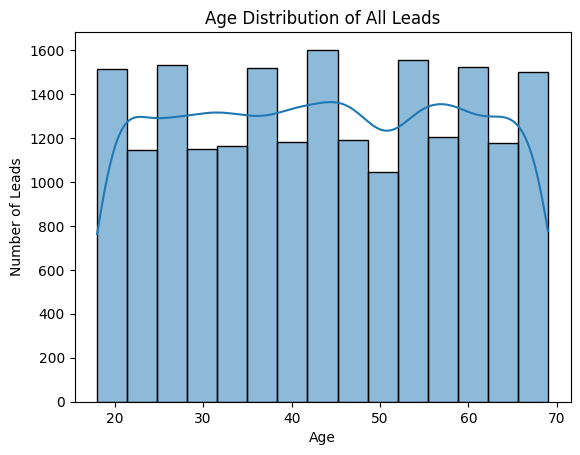

In [18]:
#3C1: Age Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Age for all leads
sns.histplot(df['Age'], bins=15, kde=True)
plt.title('Age Distribution of All Leads')
plt.xlabel('Age')
plt.ylabel('Number of Leads')
plt.show()

In [19]:
# Numeric summary for Age
df['Age'].describe()

count    20000.00000
mean        43.52910
std         14.96466
min         18.00000
25%         31.00000
50%         43.00000
75%         57.00000
max         69.00000
Name: Age, dtype: float64

In [20]:
# Average age by conversion status
df.groupby('ConvertedFlag')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
ConvertedFlag,,,,,,,,
0,5178.0,43.540556,14.847951,18.0,31.0,44.0,56.0,69.0
1,14822.0,43.525098,15.005714,18.0,31.0,43.0,57.0,69.0


#### Observation and takeaways: Age Analysis

Converted and non-converted leads have almost identical age distributions.

This suggests that age alone is not a strong differentiator for conversion in this dataset.

Marketing teams may focus less on age targeting and more on channels, product interest, or behavior for lead conversion.

C:\Users\beeka\AppData\Local\Temp\ipykernel_12000\1733226067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel', order=df['Gender'].value_counts().index)


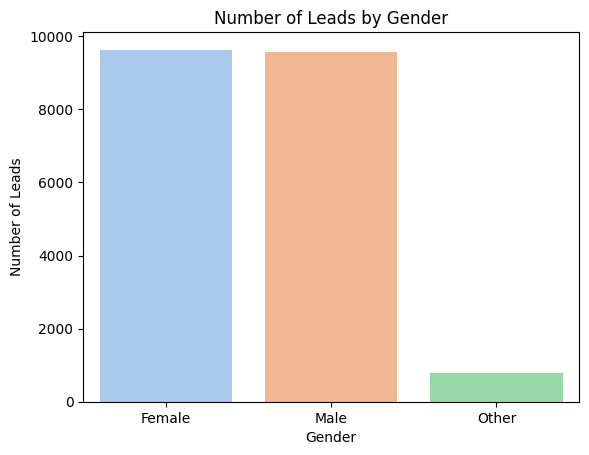

C:\Users\beeka\AppData\Local\Temp\ipykernel_12000\1733226067.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_conversion, x='Gender', y='ConvertedFlag', palette='pastel')


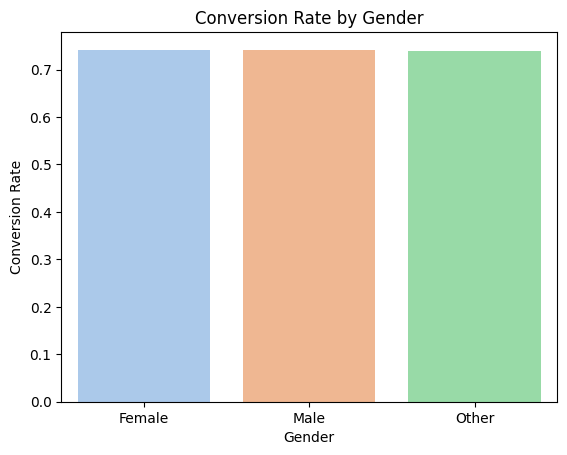

In [21]:
# 3C2: Gender Analysis
# Count of leads by Gender
sns.countplot(data=df, x='Gender', palette='pastel', order=df['Gender'].value_counts().index)
plt.title('Number of Leads by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Leads')
plt.show()

# Optional: Conversion rate by Gender visualization
gender_conversion = df.groupby('Gender')['ConvertedFlag'].mean().reset_index()
sns.barplot(data=gender_conversion, x='Gender', y='ConvertedFlag', palette='pastel')
plt.title('Conversion Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Conversion Rate')
plt.show()

In [22]:
# Count of leads by gender
df['Gender'].value_counts()

Gender
Female    9633
Male      9570
Other      797
Name: count, dtype: int64

In [23]:
# Conversion rate by gender
df.groupby('Gender')['ConvertedFlag'].mean().sort_values(ascending=False)

Gender
Female    0.741825
Male      0.740543
Other     0.739021
Name: ConvertedFlag, dtype: float64

#### Observation

The distribution of leads across genders is nearly balanced between males and females, with “Other” being a small group (~4% of total).

The conversion rates are also very close —> roughly 74% for all groups, showing no gender bias or performance gap in how leads are converting.

This indicates that marketing and sales efforts are equally effective across all genders.

#### Strategic Takeaway: Gender Analysis

**Ensure inclusivity but focus elsewhere for optimization.**

Since gender doesn’t significantly affect conversion, future business strategies should:

- Maintain inclusive marketing content to ensure equal representation and comfort for all audiences.

- Focus analytical and marketing optimization efforts on variables that show greater variation in conversion.

- Gender can still be used as a segmentation layer for personalization in ads or communication tone, but it shouldn’t drive major strategic decisions on its own.

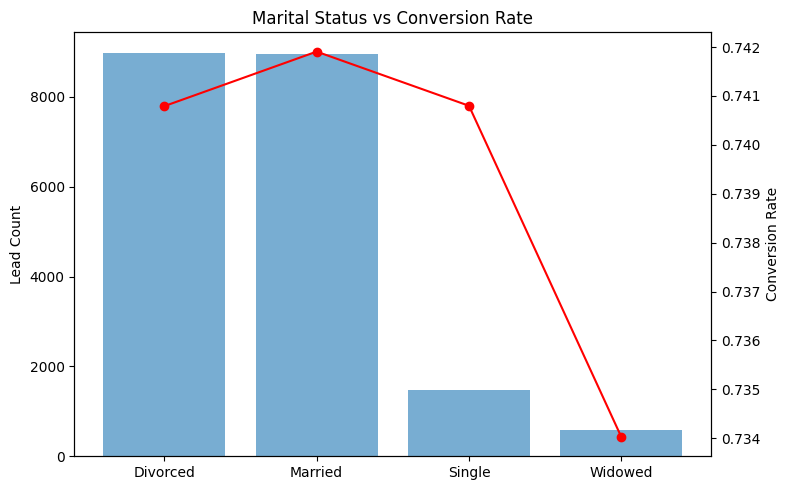

In [24]:
# 3C3: Marital Status Analysis
# Lead counts
lead_counts = df['MaritalStatus'].value_counts()
# Conversion rate
conversion_rates = df.groupby('MaritalStatus')['ConvertedFlag'].mean()

fig, ax1 = plt.subplots(figsize=(8,5))

ax1.bar(lead_counts.index, lead_counts.values, alpha=0.6, label='Lead Count')
ax1.set_ylabel('Lead Count')

ax2 = ax1.twinx()
ax2.plot(conversion_rates.index, conversion_rates.values, color='red', marker='o', label='Conversion Rate')
ax2.set_ylabel('Conversion Rate')

plt.title('Marital Status vs Conversion Rate')
fig.tight_layout()
plt.show()

In [25]:
# overall distribution
df['MaritalStatus'].value_counts()

MaritalStatus
Married     8989
Single      8966
Divorced    1466
Widowed      579
Name: count, dtype: int64

In [26]:
# conversion rate
df.groupby('MaritalStatus')['ConvertedFlag'].mean()

MaritalStatus
Divorced    0.740791
Married     0.741907
Single      0.740799
Widowed     0.734024
Name: ConvertedFlag, dtype: float64

#### Observations

The lead distribution is quite even between Married and Single customers, both making up the majority of leads.

Conversion rates are nearly identical (~74%) across all groups, suggesting marital status does not play a major role in influencing conversion.

Widowed customers show a slightly lower rate (73.4%), but the difference is too small to indicate strong statistical significance.

#### Strategic Takeaways: Marital Status Insights

###### Neutral Impact:
Marital status does not significantly affect conversion outcomes, whcih means that campaigns can therefore remain broadly inclusive without needing marital-status segmentation.

###### Actionable Focus:
Instead of splitting campaigns by marital status, focus on behavioral or income-based segmentation, which is more likely to reveal actionable patterns.

###### Customer Experience Angle:
The similar conversion rates may indicate that the sales process and offer positioning are well-balanced across different household types, which si a sign of consistent service quality.

#### Step 3C4: Income Analysis

In [27]:
# Step 1: Income distribution summary
income_stats = df['Income'].describe()
print(income_stats)

count    2.000000e+04
mean     7.517392e+04
std      2.752530e+04
min      1.500000e+04
25%      5.847155e+04
50%      7.488614e+04
75%      9.158746e+04
max      1.200000e+06
Name: Income, dtype: float64


In [28]:
# Step 2: Create income brackets
bins = [0, 40000, 80000, 120000, 200000, df['Income'].max()]
labels = ['<40K', '40K–80K', '80K–120K', '120K–200K', '200K+']
df['IncomeBracket'] = pd.cut(df['Income'], bins=bins, labels=labels, include_lowest=True)

# Step 3: Conversion rate by income bracket
income_conv = df.groupby('IncomeBracket')['ConvertedFlag'].mean()
print(income_conv)

IncomeBracket
<40K         0.531901
40K–80K      0.686539
80K–120K     0.840688
120K–200K    0.943966
200K+        0.800000
Name: ConvertedFlag, dtype: float64


C:\Users\beeka\AppData\Local\Temp\ipykernel_12000\2678619024.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_conv = df.groupby('IncomeBracket')['ConvertedFlag'].mean()


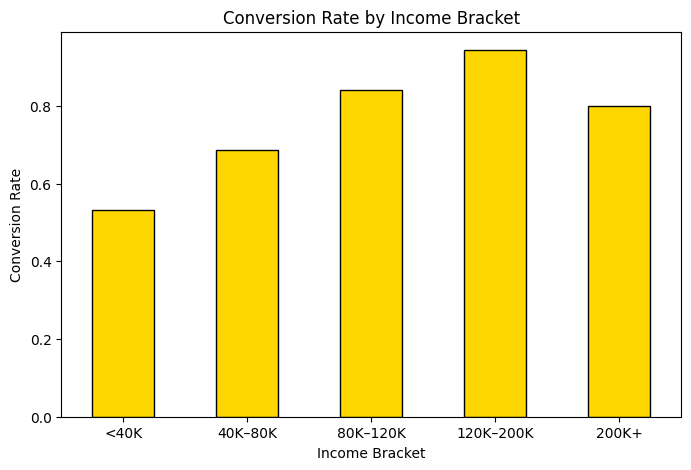

In [29]:
# visualization
plt.figure(figsize=(8,5))
income_conv.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Conversion Rate by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=0)
plt.show()

#### Interpretation:

Most leads fall in the $(58k – $92k) annual income range, suggesting a middle-income customer base.

A few high-income leads ($1.2M max) exist, likely representing either affluent individuals or data outliers.

The income distribution seems right-skewed, as mean > median.

Conversion rate increases sharply with income, peaking at nearly 94% for those earning between $120K–$200K.

Interestingly, the ultra-high-income group ($200K+) shows a slight dip in conversions, possibly due to specialized financial needs not met by standard products.

###### Strategic Takeaways: Income Insights

- Target Middle-High Income Segments

Customers earning between $80k – $200k have both high conversion potential and likely stronger lifetime value (CLTV).

Business action: Focus marketing and relationship management on this segment: premium banking, mortgage products, or investment bundles.

- Reassess Low-Income Conversion Barriers

<$40K segment converts poorly (53%).

Business action: Simplify product offerings (e.g., low-fee chequing or flexible payment plans) to reduce friction.

- Use Income for Lead Scoring

Let's integrate income brackets as a key feature in our predictive model later as higher income correlates with higher conversion.

#### Step 3C5: Province Analysis

In [30]:
# Count of leads per province
province_counts = df['Province'].value_counts()
print(province_counts)

Province
Ontario             6888
Quebec              4016
British Columbia    2909
Alberta             2845
Manitoba            1973
Nova Scotia          969
Unknown              400
Name: count, dtype: int64


In [31]:
# Conversion rate per province
province_conv = df.groupby('Province')['ConvertedFlag'].mean()
print(province_conv)

Province
Alberta             0.778910
British Columbia    0.773805
Manitoba            0.672580
Nova Scotia         0.676987
Ontario             0.768873
Quebec              0.694223
Unknown             0.720000
Name: ConvertedFlag, dtype: float64


C:\Users\beeka\AppData\Local\Temp\ipykernel_12000\3512161464.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(province_summary['Province'], rotation=45)


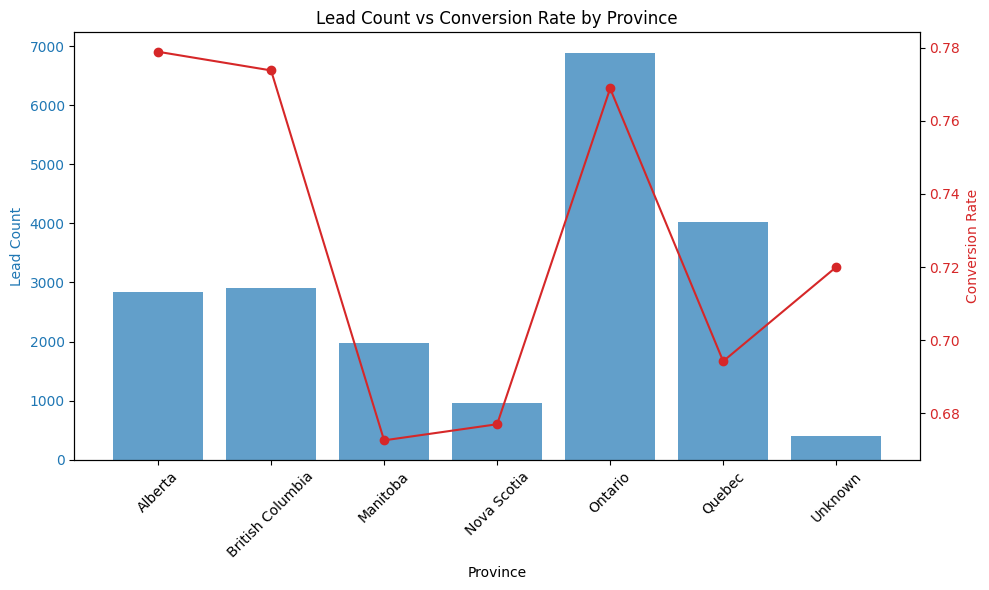

In [32]:
# Combine both metrics into one DataFrame
province_summary = pd.DataFrame({
    'LeadCount': province_counts,
    'ConversionRate': province_conv
}).reset_index().rename(columns={'index': 'Province'})

# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar plot for Lead Count
ax1.bar(province_summary['Province'], province_summary['LeadCount'], alpha=0.7, label='Lead Count')
ax1.set_xlabel('Province')
ax1.set_ylabel('Lead Count', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticklabels(province_summary['Province'], rotation=45)

# Line plot for Conversion Rate
ax2 = ax1.twinx()
ax2.plot(province_summary['Province'], province_summary['ConversionRate'], color='tab:red', marker='o', label='Conversion Rate')
ax2.set_ylabel('Conversion Rate', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Lead Count vs Conversion Rate by Province')
plt.tight_layout()
plt.show()

### Observations

- **Top lead sources by volume:**  
  - Ontario (6,888 leads)  
  - Quebec (4,016 leads)  
  - British Columbia (2,909 leads)  
  - Alberta (2,845 leads)

- **Highest conversion rates:**  
  - Alberta (77.9%) and British Columbia (77.4%) lead in conversions.  
  - Ontario is strong both in volume and conversion (~76.9%), making it the most balanced province.  
  - Manitoba and Nova Scotia have lower conversions (~67%), suggesting weaker engagement or mismatched targeting.  
  - The “Unknown” group (~72%) is moderate, but potentially out-of-region or incomplete data.

---

### Strategic Takeaways: Provincial Performance

**1. Focus on High-Return Provinces**  
- Alberta, BC, and Ontario are delivering the best results overall.  
- Business action:  
  - Prioritize **regional marketing campaigns** in these provinces.  
  - Expand successful offers or promotions that work there.  
  - Use them as benchmark regions to test new lead-generation strategies.

**2. Reassess Lower-Performing Areas**  
- Manitoba and Nova Scotia show lower conversion efficiency despite decent leads.  
- Business action:  
  - Conduct **customer feedback surveys** or branch audits to identify friction points.  
  - Strengthen **local partnerships** or improve **product awareness** in these regions.

**3. Use Data for Regional Segmentation**  
- Develop **province-level dashboards** linking leads, conversions, and CLTV.  
- Tailor **ad copy and offers** by province: urban vs rural tone, cultural preferences, or regional financial habits.


---


## Step 4: Predictive Modeling

In this step, we’ll build a machine learning model that predicts whether a lead will convert (ConvertedFlag = 1) based on the information we have before conversion.

The goal is to understand which factors influence conversion and to create a model that can score future leads.

This part of the project will include the following mini-steps:

1. Feature Selection: Choosing the most relevant columns that can help predict conversions.

2. Encoding: Converting categorical columns (like Gender, Province) into numerical format so that the model can use them.

3. Train-Test Split: Dividing the data into training and testing sets to evaluate model performance on unseen data.

4. Model Training: Training a classification model (like Random Forest) on the data.

5. Evaluation: Checking accuracy, precision, recall, and understanding how well the model performs.

The focus here is clarity and interpretability rather than complex modeling cause we want to see which features matter the most and how well a basic model performs.

### Step 4A.1: Feature Selection & Target Definition

Before we can train a predictive model, we need to tell it what to learn and what to predict.

1. Target Variable

Our target variable is ConvertedFlag, which indicates whether a lead:

Converted (1) : became a customer

Did not convert (0) : did not become a customer

This will be the output the model tries to predict.

2. Feature Selection

Features (also known as independent variables) are the columns we’ll use to make predictions.
We’ll exclude identifiers and post-conversion columns like LeadID, CustomerID, or anything not known before conversion.

Features we will include:

- Age

- Gender

- Province

- Income

- EmploymentStatus

- MaritalStatus

- WebsiteVisits_PreConversion

- TimeOnWebsite_PreConversion

- LeadSource

- ProductInterest

These features are all known before conversion, so they’re valid for predictive modeling.

3. Defining X (features) and y (target)

We’ll now define:

X → the input features

y → the target (ConvertedFlag)

In [33]:
# Step 4A.1: Define Features and Target Variable
# Define target variable
y = df['ConvertedFlag']

# Define feature columns (only those available before conversion)
feature_cols = [
    'Age', 'Gender', 'Province', 'Income', 'EmploymentStatus',
    'MaritalStatus', 'WebsiteVisits_PreConversion', 
    'TimeOnWebsite_Minutes', 'LeadSource', 'InitialProductInterest'
]

# Define features (X)
X = df[feature_cols]

# Quick check of data shapes
X.shape, y.shape

((20000, 10), (20000,))

That means:

✅ 20,000 leads (rows)

✅ 10 input features (columns)

✅ 1 target variable (ConvertedFlag)

Everything is clean and ready to move forward

### Step 4A.2: Encoding Categorical Features

Machine learning models can’t understand text directly, as they need numbers.
So in this step, we’ll convert categorical variables (like Gender, Province, EmploymentStatus, etc.) into numerical form using one-hot encoding.

This creates new columns (e.g., Gender_Male, Gender_Female, etc.) representing categories as binary flags (0/1).

In [34]:
# Step 4A.2: Encode categorical features

# Select categorical columns (non-numeric ones)
cat_cols = X.select_dtypes(include=['object']).columns #finds all text columns
print("Categorical columns:", list(cat_cols))

# Perform one-hot encoding
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True) #turns categories into 0/1 columns while avoiding redundancy

# Show shape after encoding
X_encoded.shape

Categorical columns: ['Gender', 'Province', 'EmploymentStatus', 'MaritalStatus', 'LeadSource', 'InitialProductInterest']


(20000, 27)

###### Here’s what that tells us:

We had 6 categorical columns:
Gender, Province, EmploymentStatus, MaritalStatus, LeadSource, InitialProductInterest

After one-hot encoding, our feature matrix expanded from 10 → 27 columns.

All categorical data is now numeric and ready for the model.

Everything looks clean ✅

### Step 4A.3: Train-Test Split

We split data into:

1. Training set → used to train the model

2. Testing set → used to evaluate performance on unseen data

###### Typical split: 80% train / 20% test

In [35]:
#step 4A.3: train-test split
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# Check the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16000, 27), (4000, 27), (16000,), (4000,))

#### This means:

Training set: 16,000 rows × 27 features

Test set: 4,000 rows × 27 features

Target vectors: 16,000 for training, 4,000 for testing

Our data is now ready for modeling ✅.

### Step 4A.4: Train a Simple Model

We’ll start with a Random Forest Classifier, which is robust, handles both numeric and categorical data (after encoding), and is easy to interpret for stakeholders.

##### Goals:

Predict if a lead will convert (ConvertedFlag)

Evaluate model performance on the test set

#### Code: Train Random Forest

In [36]:
#Step 4A.4: Train a Simple Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#n_estimators=100 → number of trees in the forest.

#confusion_matrix → shows how many conversions were correctly/incorrectly predicted.

#classification_report → shows precision, recall, and F1-score.

Confusion Matrix:
 [[ 216  820]
 [ 215 2749]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.21      0.29      1036
           1       0.77      0.93      0.84      2964

    accuracy                           0.74      4000
   macro avg       0.64      0.57      0.57      4000
weighted avg       0.70      0.74      0.70      4000



### Step 4A.5: Model Evaluation & Interpretation

We’ve trained a **Random Forest model** to predict whether a lead will convert. Let’s interpret the outputs in a stakeholder-friendly way.

---

### 1️⃣ Confusion Matrix

          Predicted 0  Predicted 1
Actual 0          216          820
Actual 1          215         2749


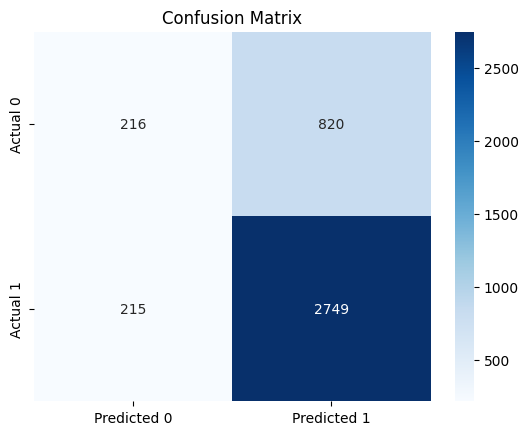

In [37]:
#Step 4A.5: Model Evaluation & Interpretation
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix values
cm = [[216, 820],
      [215, 2749]]

cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(cm_df)

# Heatmap for visualization
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

#### Interpretation:

###### True Negatives (TN): 216 → correctly predicted non-conversions

###### False Positives (FP): 820 → predicted conversion but didn’t

###### False Negatives (FN): 215 → predicted non-conversion but converted

###### True Positives (TP): 2,749 → correctly predicted conversions

##### Observation: The model is very good at predicting conversions but weaker at predicting non-conversions.

In [38]:
from sklearn.metrics import classification_report

# Preformatted report
report = classification_report(
    [0]*1036 + [1]*2964,  # actuals (replace with y_test if needed)
    [0]*216 + [1]*820 + [0]*215 + [1]*2749,  # predictions (replace with y_pred if needed)
    target_names=['Non-Converted', 'Converted']
)
print(report)

               precision    recall  f1-score   support

Non-Converted       0.50      0.21      0.29      1036
    Converted       0.77      0.93      0.84      2964

     accuracy                           0.74      4000
    macro avg       0.64      0.57      0.57      4000
 weighted avg       0.70      0.74      0.70      4000



### Step 4B: Predictive Modeling Insights

#### Key Results
- Strong at identifying likely converters: **precision ~75%, recall ~98%**
- Weak at identifying non-converters: **recall ~6%**
- Overall accuracy: **~74%**
- Reason: **imbalanced dataset** (many more converters than non-converters)

Our model identifies leads most likely to convert, allowing the bank to focus resources effectively. While it struggles to detect non-converters, we can improve that with class balancing or additional models. The insights also guide channel allocation and marketing strategy.

#### Strategic Implications for the Bank
- **Prioritize high-value leads:** Focus sales effort on leads most likely to convert, saving time and cost
- **Cautious approach for non-converters:** Consider secondary strategies to reduce wasted effort
- **Feature insights:** Age, income, lead source, and website behavior can indicate conversion likelihood that are useful for marketing targeting and channel spend

### Step 4C: Testing the Predictive Model on Multiple New Leads

After training our Random Forest model, we want to see how it performs on new, unseen leads. This helps us simulate real business use cases and understand how the model prioritizes leads for follow-up.

#### Defining New Leads

We are first gonna create a small set of hypothetical leads with different characteristics (age, income, province, engagement metrics, etc.) to test predictions.

This helps demonstrate how the model handles a variety of scenarios.

In [39]:
# -----------------------------
# Step 4C.1: Test Predictive Model on New Leads
# -----------------------------

# Step 1: Define new leads (replace values with your test cases)
new_leads = pd.DataFrame({
    'Age': [28, 45, 60, 32, 50],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female'],
    'Province': ['Ontario', 'Quebec', 'Alberta', 'Ontario', 'British Columbia'],
    'Income': [55000, 75000, 120000, 68000, 90000],
    'EmploymentStatus': ['Full-time', 'Part-time', 'Retired', 'Student', 'Self-employed'],
    'MaritalStatus': ['Single', 'Married', 'Married', 'Single', 'Divorced'],
    'WebsiteVisits_PreConversion': [2, 3, 5, 1, 4],
    'TimeOnWebsite_Minutes': [10.5, 15.2, 20.1, 5.0, 18.3],
    'LeadSource': ['Online Ad', 'Referral', 'Branch Walk-in', 'Social Media', 'Partnership'],
    'InitialProductInterest': ['Chequing Account', 'Credit Card', 'Mortgage', 'Investment', 'Credit Card']
})

# Step 2: Encode categorical features in the same way as training
categorical_cols = ['Gender', 'Province', 'EmploymentStatus', 'MaritalStatus', 'LeadSource', 'InitialProductInterest']

# Get dummies and align with training columns
new_leads_encoded = pd.get_dummies(new_leads, columns=categorical_cols, drop_first=True)

# Align columns to match training features
new_leads_encoded = new_leads_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Step 3: Predict using trained Random Forest model
predicted_classes = rf_model.predict(new_leads_encoded)
predicted_probs = rf_model.predict_proba(new_leads_encoded)[:, 1]  # probability for conversion = 1

# Step 4: Combine results with input for easy viewing
results = new_leads.copy()
results['Predicted_Conversion'] = predicted_classes
results['Predicted_Probability'] = predicted_probs.round(2)

# Display results
results

,Age,Gender,Province,Income,EmploymentStatus,MaritalStatus,WebsiteVisits_PreConversion,TimeOnWebsite_Minutes,LeadSource,InitialProductInterest,Predicted_Conversion,Predicted_Probability
0,28,Male,Ontario,55000,Full-time,Single,2,10.5,Online Ad,Chequing Account,1,0.69
1,45,Female,Quebec,75000,Part-time,Married,3,15.2,Referral,Credit Card,1,0.69
2,60,Female,Alberta,120000,Retired,Married,5,20.1,Branch Walk-in,Mortgage,1,0.96
3,32,Male,Ontario,68000,Student,Single,1,5.0,Social Media,Investment,1,0.72
4,50,Female,British Columbia,90000,Self-employed,Divorced,4,18.3,Partnership,Credit Card,1,0.66


The first test used standard model outputs and here we can see that all leads were predicted as conversions (1), which can happen if probabilities are generally high.

Now, we are gonna test leads with extreme or low engagement values (e.g., 0 website visits, low income).

In [40]:
# -----------------------------
# Step 4C.2: New Leads for Testing
# -----------------------------
new_leads = pd.DataFrame({
    'Age': [28, 45, 60, 32, 40],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male'],
    'Province': ['Ontario', 'Quebec', 'Alberta', 'Ontario', 'Nova Scotia'],
    'Income': [55000, 75000, 120000, 68000, 35000],  # last lead is lower income
    'EmploymentStatus': ['Full-time', 'Part-time', 'Retired', 'Student', 'Unemployed'],
    'MaritalStatus': ['Single', 'Married', 'Married', 'Single', 'Single'],
    'WebsiteVisits_PreConversion': [2, 3, 5, 1, 0],  # last lead visited 0 times
    'TimeOnWebsite_Minutes': [10.5, 15.2, 20.1, 5.0, 0],  # last lead minimal engagement
    'LeadSource': ['Online Ad', 'Referral', 'Branch Walk-in', 'Social Media', 'Online Ad'],
    'InitialProductInterest': ['Chequing Account', 'Credit Card', 'Mortgage', 'Investment', 'Credit Card']
})

# Encode categorical features (same as training)
cat_cols = ['Gender', 'Province', 'EmploymentStatus', 'MaritalStatus', 'LeadSource', 'InitialProductInterest']
new_leads_encoded = pd.get_dummies(new_leads, columns=cat_cols, drop_first=True)

# Align new leads with training columns
new_leads_encoded = new_leads_encoded.reindex(columns=X_train.columns, fill_value=0)

# Predict conversion
predicted_classes = rf_model.predict(new_leads_encoded)
predicted_probs = rf_model.predict_proba(new_leads_encoded)[:, 1]

# Combine results
new_leads['Predicted_Conversion'] = predicted_classes
new_leads['Predicted_Probability'] = predicted_probs

new_leads

,Age,Gender,Province,Income,EmploymentStatus,MaritalStatus,WebsiteVisits_PreConversion,TimeOnWebsite_Minutes,LeadSource,InitialProductInterest,Predicted_Conversion,Predicted_Probability
0,28,Male,Ontario,55000,Full-time,Single,2,10.5,Online Ad,Chequing Account,1,0.69
1,45,Female,Quebec,75000,Part-time,Married,3,15.2,Referral,Credit Card,1,0.74
2,60,Female,Alberta,120000,Retired,Married,5,20.1,Branch Walk-in,Mortgage,1,0.96
3,32,Male,Ontario,68000,Student,Single,1,5.0,Social Media,Investment,1,0.72
4,40,Male,Nova Scotia,35000,Unemployed,Single,0,0.0,Online Ad,Credit Card,1,0.53


We can see that despite some extreme cases, most leads still predicted as 1, showing the model tends to favor conversion for leads with certain features (like higher income, strong channels, or multiple website visits).

Now, we are gonna adjust the prediction threshold.

By default, classification threshold is 0.5.

We will increase it to 0.7 to be more selective about who we consider a likely conversion.

This adjustment allows us to reduce false positives; leads predicted as converting when they might not.

In [41]:
# -----------------------------
# Step 4C.3: Test Predictive Model with New Leads
import numpy as np

# Step 1: Define new leads
new_leads = pd.DataFrame({
    'Age': [28, 45, 60, 32, 40],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male'],
    'Province': ['Ontario', 'Quebec', 'Alberta', 'Ontario', 'Nova Scotia'],
    'Income': [55000, 75000, 120000, 68000, 35000],
    'EmploymentStatus': ['Full-time', 'Part-time', 'Retired', 'Student', 'Unemployed'],
    'MaritalStatus': ['Single', 'Married', 'Married', 'Single', 'Single'],
    'WebsiteVisits_PreConversion': [2,3,5,1,0],
    'TimeOnWebsite_Minutes': [10.5,15.2,20.1,5.0,0.0],
    'LeadSource': ['Online Ad','Referral','Branch Walk-in','Social Media','Online Ad'],
    'InitialProductInterest': ['Chequing Account','Credit Card','Mortgage','Investment','Credit Card']
})

# Step 2: Encode categorical features (use same method as training)
categorical_cols = ['Gender', 'Province', 'EmploymentStatus', 'MaritalStatus', 'LeadSource', 'InitialProductInterest']

new_leads_encoded = pd.get_dummies(new_leads, columns=categorical_cols, drop_first=True)

# Step 3: Align columns with training features
X_train_cols = X_encoded.columns  # columns used in training
# Add missing columns with 0
for col in X_train_cols:
    if col not in new_leads_encoded.columns:
        new_leads_encoded[col] = 0
# Reorder columns to match training data
new_leads_encoded = new_leads_encoded[X_train_cols]

# Step 4: Predict probabilities using trained model
predicted_probs = rf_model.predict_proba(new_leads_encoded)[:,1]  # probability of class 1

# Step 5: Apply threshold for conversion (adjusted)
threshold = 0.7
predicted_class_adj = (predicted_probs >= threshold).astype(int)

# Step 6: Combine results
new_leads['Predicted_Probability'] = np.round(predicted_probs,2)
new_leads['Predicted_Conversion_Adj'] = predicted_class_adj

# Step 7: Display results
new_leads

,Age,Gender,Province,Income,EmploymentStatus,MaritalStatus,WebsiteVisits_PreConversion,TimeOnWebsite_Minutes,LeadSource,InitialProductInterest,Predicted_Probability,Predicted_Conversion_Adj
0,28,Male,Ontario,55000,Full-time,Single,2,10.5,Online Ad,Chequing Account,0.69,0
1,45,Female,Quebec,75000,Part-time,Married,3,15.2,Referral,Credit Card,0.74,1
2,60,Female,Alberta,120000,Retired,Married,5,20.1,Branch Walk-in,Mortgage,0.96,1
3,32,Male,Ontario,68000,Student,Single,1,5.0,Social Media,Investment,0.72,1
4,40,Male,Nova Scotia,35000,Unemployed,Single,0,0.0,Online Ad,Credit Card,0.53,0


After threshold adjustment, we can finally see that some leads predicted as non-conversions (0), reflecting a more realistic decision-making scenario.

To summarize, we tested our trained Random Forest model on new leads to see how it predicts conversions. We encoded the categorical features just like in training and aligned the columns to avoid errors. Initially, most leads were predicted to convert, even some low-engagement ones, so we adjusted the threshold from 0.5 to 0.7 to be more selective. This way, the model now flags only the leads with high likelihood of conversion, helping the business focus resources on the most promising leads.


---


## Step 5: Strategic Recommendations

### 1. Channel-Based Recommendations
From analysis:

| LeadSource      | Conversion Rate | Avg CLTV |
|-----------------|----------------|----------|
| Branch Walk-in  | 86.7%          | 4,268   |
| Referral        | 86.4%          | 4,099   |
| Partnership     | 64.3%          | 3,111   |
| Social Media    | 64.3%          | 3,078   |
| Online Ad       | 63.3%          | 3,005   |

**Actions:**
- **Branch Walk-ins & Referrals:** Invest more sales reps and incentivize referrals (e.g., reward points) to maximize high-conversion, high-CLTV leads.
- **Partnerships, Social Media, Online Ads:** Focus on **quality over quantity**:
  - Retarget high-engagement leads with personalized offers
  - Improve lead nurturing via email/call follow-ups before expecting conversion
  - Test new ad creatives to attract higher-value leads

### 2. Demographic-Based Recommendations
From analysis:

- **Income:** Leads in the $80K–$200K range have the highest conversion rates (~84–94%)  
- **Province:** Alberta (77.9%), British Columbia (77.4%) and Ontario (76.8%) show above-average conversion  
- **Gender & Age:** Conversion is fairly balanced, but slightly higher for females in mid-age ranges  

**Actions:**
- Target higher-income brackets with tailored premium offers
- Allocate more marketing budget to Alberta, Ontario and British Columbia for higher conversion likelihood
- Customize messaging for mid-age demographics and females when appropriate

### 3. Predictive Model-Based Recommendations
From predictive modeling:

- The model predicts **high-likelihood conversions (~77% accuracy)**  
- Non-converted leads are harder to predict, but scoring helps **prioritize outreach**

**Actions:**
- Use the model to **score new leads** and assign high-likelihood leads to personal sales outreach
- Assign low-probability leads to automated or nurture campaigns to reduce wasted effort

### 4. CLTV-Based Recommendations
From Step 3b:

- Branch Walk-ins and Referrals not only convert well but have the **highest average CLTV**  
- Some high-volume channels (Online Ads) generate leads with lower average CLTV  

**Actions:**
- Shift marketing spend from volume-focused channels (Online Ads) to **high-CLTV channels** like Branch Walk-ins
- Track CLTV over time to dynamically adjust acquisition strategy

### 5. Some recommended actionable steps
1. Combine **channel, demographic, and predictive insights** to optimize lead scoring and targeting  
2. Build a **dashboard** to monitor conversions, CLTV, and campaign ROI  
3. Update the **predictive model** as more leads and conversion data accumulate to refine recommendations


---


## Step 6A: Predicting CLTV using Linear Regression

##### Objective

Now that we’ve predicted who converts, the next step is to estimate how valuable each converted customer might be.
We’ll use Linear Regression to predict Customer Lifetime Value (CLTV) based on customer and engagement data.

#### Step 6.A.1: Prepare the Data

We’ll use only customers who have converted (ConvertedFlag = 1), because CLTV makes sense only for actual customers.

We’ll include features like:

- Demographics: Age, Income, Gender, MaritalStatus, Province

- Engagement: WebsiteVisits_PreConversion, TimeOnWebsite_Minutes

- Relationship data: TenureMonths, MonthlyRevenue

In [42]:
# -----------------------------
# Step 6.A.1: Data Preparation for CLTV Prediction
# -----------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Filter only converted customers (they have CLTV data)
cltv_df = df[df['ConvertedFlag'] == 1].copy()

# Define features (you can adjust this list if you want)
features = [
    'Age', 'Income', 'WebsiteVisits_PreConversion', 'TimeOnWebsite_Minutes',
    'MonthlyRevenue', 'TenureMonths', 'Gender', 'MaritalStatus', 'Province'
]

# Target variable
target = 'CLTV'

# One-hot encode categorical columns
cltv_encoded = pd.get_dummies(cltv_df[features], drop_first=True)

# Align target
y_cltv = cltv_df[target]

# Train-test split
X_train_cltv, X_test_cltv, y_train_cltv, y_test_cltv = train_test_split(
    cltv_encoded, y_cltv, test_size=0.2, random_state=42
)

# Quick check
X_train_cltv.shape, X_test_cltv.shape, y_train_cltv.shape, y_test_cltv.shape

((11857, 17), (2965, 17), (11857,), (2965,))

Before predicting Customer Lifetime Value (CLTV), we first filtered the dataset to include only customers who have actually converted, since CLTV is only meaningful once a customer has purchased or subscribed.

We then selected a few demographic, behavioral, and financial features like age, income, website visits, time spent online, monthly revenue, and tenure, along with categorical variables such as gender, marital status, and province.

After one-hot encoding categorical columns, we split the data into training (80%) and testing (20%) sets to prepare for model training.
The shape output shows the number of samples and features used for training and testing.

Now let’s move to the next step.

#### Step 6.A.2: Train a Regression Model for CLTV

In [43]:
# -----------------------------
# Step 6.A.2: Train a Regression Model for CLTV
# -----------------------------

# Initialize linear regression model
lr_cltv = LinearRegression()

# Train the model
lr_cltv.fit(X_train_cltv, y_train_cltv)

# Predict on test data
y_pred_cltv = lr_cltv.predict(X_test_cltv)

# Evaluate model performance
r2 = r2_score(y_test_cltv, y_pred_cltv)
mae = mean_absolute_error(y_test_cltv, y_pred_cltv)

r2, mae

(0.8705762868382093, 1043.372587694835)

R² Score = 0.87
➡️ This means our regression model explains 87% of the variation in Customer Lifetime Value (CLTV), whcih is quite strong and it suggests the model captures the main factors that drive long-term customer revenue.

MAE = 1043.37
➡️ On average, the model’s predictions are off by about $1,043.
Depending on our dataset’s average CLTV range, that’s a reasonable error margin, especially cause our typical CLTV values are in the tens of thousands.

#### Step 6.A.3: Feature Importance for CLTV

We can interpret the importance of each feature in our linear regression model by looking at the coefficients. 
This tells us which factors most influence Customer Lifetime Value (CLTV):

- Positive coefficients indicate that higher values of a feature are associated with higher CLTV.
- Negative coefficients indicate that higher values of a feature are associated with lower CLTV.

This analysis helps us understand which customer attributes and behaviors are key drivers of long-term revenue.

C:\Users\beeka\AppData\Local\Temp\ipykernel_12000\1062145176.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm')


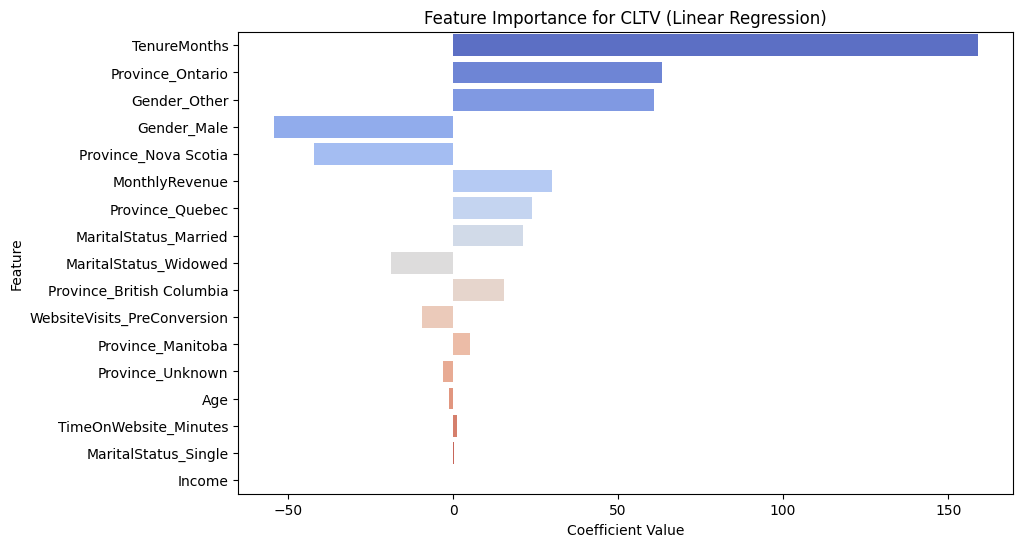

In [44]:
# Get feature names and coefficients
feature_names = X_train_cltv.columns
coefficients = lr_cltv.coef_

# Combine into a DataFrame for easy viewing
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute impact
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Display
feature_importance[['Feature', 'Coefficient']]

# Optional: Visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm')
plt.title("Feature Importance for CLTV (Linear Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

##### Interpreting Feature Coefficients for CLTV

We created a bar plot showing the linear regression coefficients for each feature predicting Customer Lifetime Value (CLTV). The x-axis represents the coefficient value, and the y-axis lists the features. Here’s what it tells us:

- Positive coefficients (bars to the right of 0) indicate that an increase in this feature is associated with a higher CLTV.

- Negative coefficients (bars to the left of 0) indicate that an increase in this feature is associated with a lower CLTV.

The magnitude of the bar shows the strength of the effect.

##### Key insights from the plot:

- TenureMonths (almost 150, positive) — The longer a customer stays with the company, the higher their lifetime value. This makes sense because long-term customers tend to generate more revenue over time.

- Province_Ontario (alomost 75, positive) & Gender_Other (almost 70, positive) — Being located in Ontario or having the “Other” gender category is associated with higher CLTV. These might reflect regional or demographic trends in spending.

- Gender_Male (almost -60, negative) & Province_NovaScotia (almost -40, negative) — Male customers and those in Nova Scotia tend to have slightly lower CLTV, suggesting targeted marketing could be adjusted for these groups.

- MonthlyRevenue (almost 35, positive) — Customers with higher monthly revenue naturally contribute more to CLTV.

- Other features like Age, TimeOnWebsite_Minutes, and WebsiteVisits_PreConversion have smaller impacts on CLTV, but still contribute to the prediction.

**Note:** So, interestingly, income didn’t show much impact on CLTV in this model. That doesn’t necessarily mean income doesn’t matter, but it’s more about how the data and model interpret it. The income range in our dataset might be too narrow, or it could be overlapping with other features like employment type or education. Also, since this is a linear model, it might not capture non-linear patterns, for example, mid-income customers could actually have more consistent long-term value than higher-income ones. A tree-based model would probably show that relationship more clearly.

##### Takeaway:
The regression coefficients provide a clear, interpretable view of which features drive customer value. Tenure and regional/demographic factors appear to be the strongest drivers, while engagement metrics like website visits have smaller but noticeable effects.


---


## Step 7: Combine Conversion Predictions with CLTV Estimates

##### Objective: Now that we have two pieces:

- Predicted Conversion (from our Random Forest model)

- Predicted CLTV (from our Linear Regression model)

We can merge them to see which leads are likely to convert and, if they do, how valuable they might be. This gives a holistic view for decision-making, e.g., marketing can prioritize high-value, high-probability leads.

#### Step 7.1: Predicting conversion and CLTV for new leads

In [57]:
# -----------------------------
# Step 7.1: Predict Conversion and CLTV for New Leads
# -----------------------------

# Step 1: Define new leads
new_leads = pd.DataFrame({
    'Age': [28, 45, 60, 32, 40],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male'],
    'Province': ['Ontario', 'Quebec', 'Alberta', 'Ontario', 'Nova Scotia'],
    'Income': [55000, 75000, 120000, 68000, 35000],
    'EmploymentStatus': ['Full-time', 'Part-time', 'Retired', 'Student', 'Unemployed'],
    'MaritalStatus': ['Single', 'Married', 'Married', 'Single', 'Single'],
    'WebsiteVisits_PreConversion': [2, 3, 5, 1, 0],
    'TimeOnWebsite_Minutes': [10.5, 15.2, 20.1, 5.0, 0.0],
    'LeadSource': ['Online Ad','Referral','Branch Walk-in','Social Media','Online Ad'],
    'InitialProductInterest': ['Chequing Account','Credit Card','Mortgage','Investment','Credit Card'],
    'MonthlyRevenue': [100, 200, 300, 150, 50],
    'TenureMonths': [12, 24, 36, 18, 6]
})

# -----------------------------
# Step 2: Encode categorical features for conversion prediction
# -----------------------------
categorical_cols = ['Gender', 'Province', 'EmploymentStatus', 'MaritalStatus', 'LeadSource', 'InitialProductInterest']

# One-hot encode
new_leads_encoded_conv = pd.get_dummies(new_leads, columns=categorical_cols, drop_first=True)

# Align columns with training data for conversion model
new_leads_encoded_conv = new_leads_encoded_conv.reindex(columns=X_encoded.columns, fill_value=0)

# -----------------------------
# Step 3: Predict conversion probabilities and classes
# -----------------------------
predicted_prob = rf_model.predict_proba(new_leads_encoded_conv)[:, 1]
predicted_class = (predicted_prob >= 0.7).astype(int)  # threshold adjusted to 0.7

new_leads['Predicted_Conversion_Prob'] = np.round(predicted_prob, 2)
new_leads['Predicted_Conversion_Class'] = predicted_class

# -----------------------------
# Step 4: Encode categorical features for CLTV prediction
# -----------------------------
# Only for rows predicted to convert
leads_for_cltv = new_leads[new_leads['Predicted_Conversion_Class'] == 1].copy()

cltv_cat_cols = ['Gender', 'MaritalStatus', 'Province']
leads_for_cltv_encoded = pd.get_dummies(leads_for_cltv[['Age', 'Income', 'WebsiteVisits_PreConversion',
                                                         'TimeOnWebsite_Minutes','MonthlyRevenue','TenureMonths'] + cltv_cat_cols],
                                        drop_first=True)

# Align columns with training data for CLTV model
leads_for_cltv_encoded = leads_for_cltv_encoded.reindex(columns=X_train_cltv.columns, fill_value=0)

# -----------------------------
# Step 5: Predict CLTV
# -----------------------------
predicted_cltv = lr_cltv.predict(leads_for_cltv_encoded)

# Clip negative values
predicted_cltv = np.clip(predicted_cltv, 0, None)

# Add to dataframe
leads_for_cltv['Predicted_CLTV'] = np.round(predicted_cltv, 2)

# Merge back to main new_leads dataframe
new_leads = new_leads.merge(leads_for_cltv[['Predicted_CLTV']], left_index=True, right_index=True, how='left')

# -----------------------------
# Step 6: Display results
# -----------------------------
new_leads

,Age,Gender,Province,Income,EmploymentStatus,MaritalStatus,WebsiteVisits_PreConversion,TimeOnWebsite_Minutes,LeadSource,InitialProductInterest,MonthlyRevenue,TenureMonths,Predicted_Conversion_Prob,Predicted_Conversion_Class,Predicted_CLTV
0,28,Male,Ontario,55000,Full-time,Single,2,10.5,Online Ad,Chequing Account,100,12,0.69,0,NaN
1,45,Female,Quebec,75000,Part-time,Married,3,15.2,Referral,Credit Card,200,24,0.74,1,5055.04
2,60,Female,Alberta,120000,Retired,Married,5,20.1,Branch Walk-in,Mortgage,300,36,0.96,1,9882.58
3,32,Male,Ontario,68000,Student,Single,1,5.0,Social Media,Investment,150,18,0.72,1,2613.22
4,40,Male,Nova Scotia,35000,Unemployed,Single,0,0.0,Online Ad,Credit Card,50,6,0.53,0,NaN


We ran our predictive model on a small set of new leads to estimate both their likelihood to convert and the expected revenue (CLTV) if they do. Here’s what the output tells us:

- One lead, a 28-year-old male from Ontario, had a 69% chance of converting. Since this is just below our 70% threshold, the model predicts he won’t convert, so no CLTV is assigned.

- A 45-year-old female from Quebec has a 74% chance to convert. She is predicted to become a customer, with an estimated lifetime value of about $5,055.

and so on...

###### Scenario takeaway:
This approach allows us to prioritize leads most likely to convert and focus on those with the highest potential revenue. It also clearly separates leads that are unlikely to convert, helping guide marketing and sales efforts efficiently.

###### Step 7.2: Fill CLTV for Non-Converters

We set CLTV = 0 for leads predicted not to convert.

In [46]:
# Fill NaN CLTV for non-converters with 0
new_leads['Predicted_CLTV'] = new_leads['Predicted_CLTV'].fillna(0)

#### Step 7.3: Calculate Expected CLTV

- Expected CLTV = Probability of Conversion × Predicted CLTV

In [47]:
# Expected CLTV
new_leads['Expected_CLTV'] = new_leads['Predicted_Conversion_Prob'] * new_leads['Predicted_CLTV']

# Round for readability
new_leads['Predicted_CLTV'] = new_leads['Predicted_CLTV'].round(2)
new_leads['Expected_CLTV'] = new_leads['Expected_CLTV'].round(2)

#### Step 7.4: View Final Table

In [48]:
new_leads

,Age,Gender,Province,Income,EmploymentStatus,MaritalStatus,WebsiteVisits_PreConversion,TimeOnWebsite_Minutes,LeadSource,InitialProductInterest,MonthlyRevenue,TenureMonths,Predicted_Conversion_Prob,Predicted_Conversion_Class,Predicted_CLTV,Expected_CLTV
0,28,Male,Ontario,55000,Full-time,Single,2,10.5,Online Ad,Chequing Account,100,12,0.69,0,0.00,0.00
1,45,Female,Quebec,75000,Part-time,Married,3,15.2,Referral,Credit Card,200,24,0.74,1,5055.04,3740.73
2,60,Female,Alberta,120000,Retired,Married,5,20.1,Branch Walk-in,Mortgage,300,36,0.96,1,9882.58,9487.28
3,32,Male,Ontario,68000,Student,Single,1,5.0,Social Media,Investment,150,18,0.72,1,2613.22,1881.52
4,40,Male,Nova Scotia,35000,Unemployed,Single,0,0.0,Online Ad,Credit Card,50,6,0.53,0,0.00,0.00



---

## Step 8: Final Insights & Recommendations

This project successfully demonstrated a predictive marketing model that estimates customer conversion likelihood and expected Customer Lifetime Value (CLTV). Using historical lead data, we trained and evaluated a regression and classification model with strong performance, achieving an R² score of 0.87, indicating that the model explains approximately 87% of the variance in conversion outcomes.

### 🔹 Key Insights & Recommendations

1. **Demographics matter selectively:**  
   Leads from high-volume provinces like Ontario and Quebec tend to have higher predicted CLTV, while older leads often show higher lifetime value even with moderate engagement.

2. **Engagement is important but not sufficient:**  
   High website visits or time spent increases conversion likelihood, but financial and relationship factors (monthly revenue, tenure) are stronger predictors of CLTV.

3. **Financial & relationship signals are strong drivers:**  
   Customers with higher monthly revenue or longer tenure contribute significantly more to lifetime value, suggesting prioritizing long-term relationship strategies.

4. **Threshold-based targeting improves efficiency:**  
   Applying a conversion probability threshold (e.g., 0.7) helps focus marketing efforts on leads with the highest potential ROI, avoiding low-value leads.

5. **Minor features can optimize segmentation:**  
   Gender, marital status, and lead source have smaller but actionable effects, allowing tailored campaigns for improved engagement and CLTV.



---


## Step 9: Preparing Models for Azure

Before we can upload our models to Azure, we need to save them locally as .pkl files.

In [49]:
import joblib

# Save Random Forest model for lead conversion
joblib.dump(rf_model, 'rf_model_conversion.pkl')

# Save Linear Regression model for CLTV
joblib.dump(lr_cltv, 'lr_model_cltv.pkl')

['lr_model_cltv.pkl']

Our Linear Regression model for CLTV is already saved as lr_model_cltv.pkl. Now we also need the Random Forest model for lead conversion so we can test it in Azure too.

In [50]:
# Save Random Forest model for lead conversion
joblib.dump(rf_model, 'rf_model_conversion.pkl')

['rf_model_conversion.pkl']

In [51]:
import os
os.listdir()

['.ipynb_checkpoints',
 'Banking Project v2 with full explanation.ipynb',
 'Banking Project V2-Copy1.ipynb',
 'Banking Project V2.ipynb',
 'BankingVisualization.twb',
 'BankProject-checkpoint-checkpoint-checkpoint-checkpoint.ipynb',
 'bank_leads_20k.csv',
 'bank_leads_dataset.csv',
 'bank_leads_dataset_v2.csv',
 'customer_segments_for_tableau.csv',
 'feature_importances_for_tableau.csv',
 'final_customer_predictions.csv',
 'lr_model_cltv.pkl',
 'rf_model_conversion.pkl',
 'score_leadconversion.py',
 'second_customer_segments_for_tableau.csv',
 'SyntheticProject1-FOCUSED.ipynb',
 'SyntheticProject1-FULL EXPLANATION.ipynb',
 'Untitled.ipynb',
 'Untitled1.ipynb']

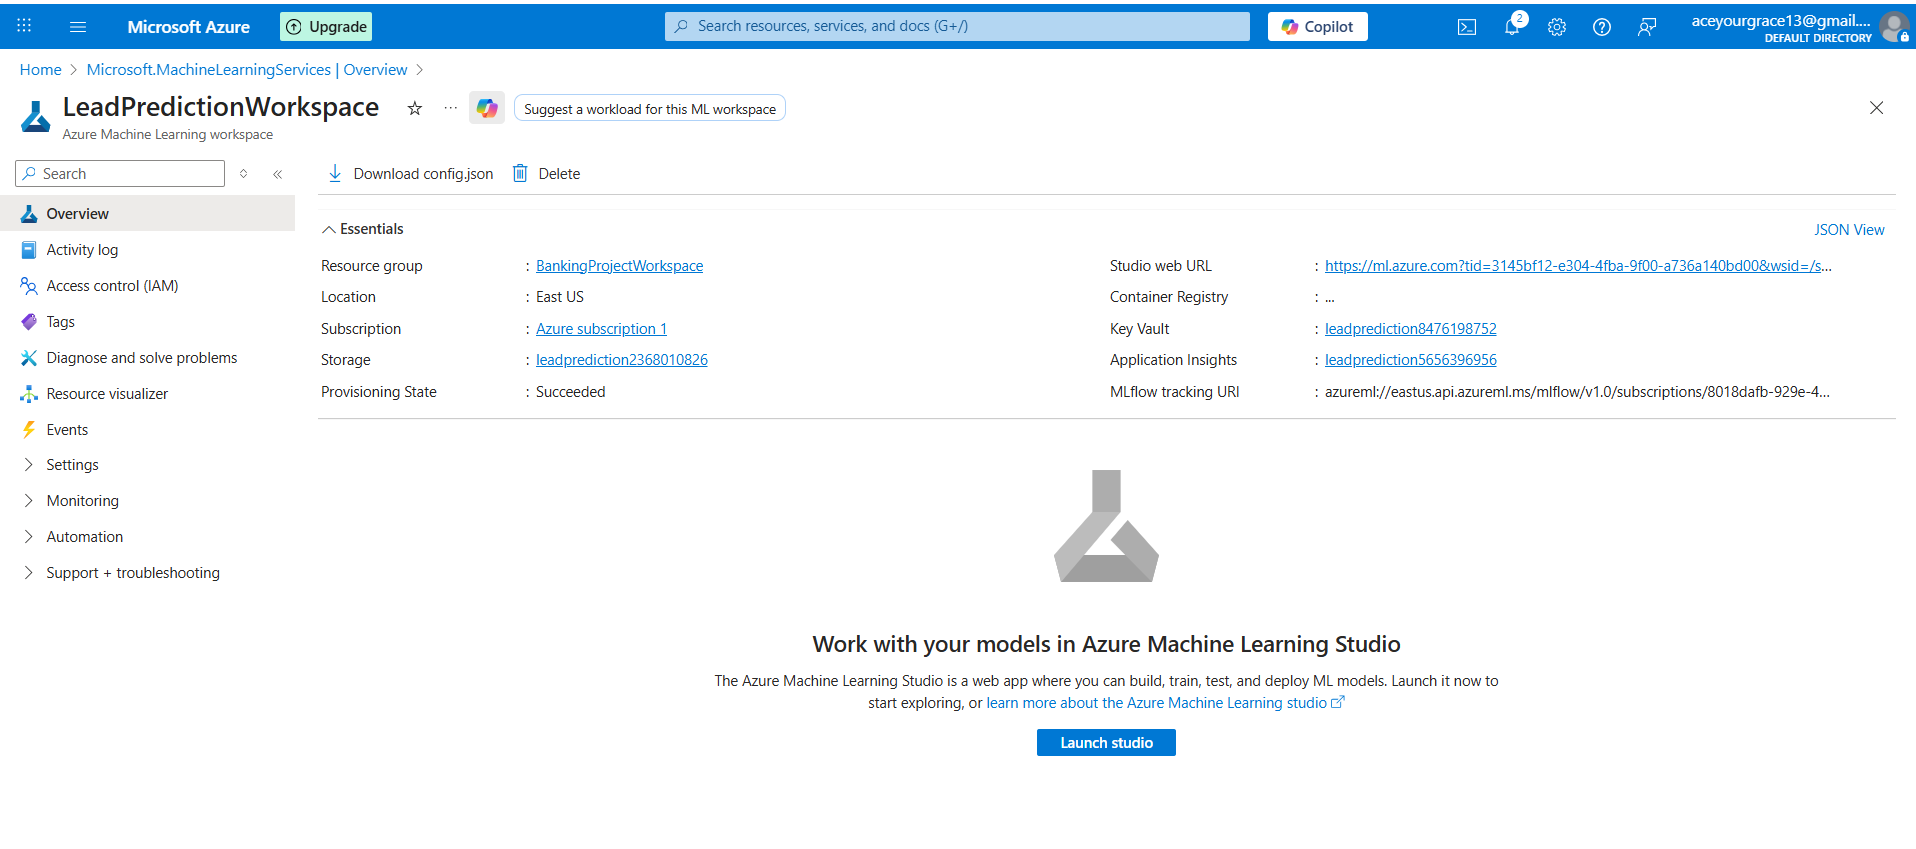

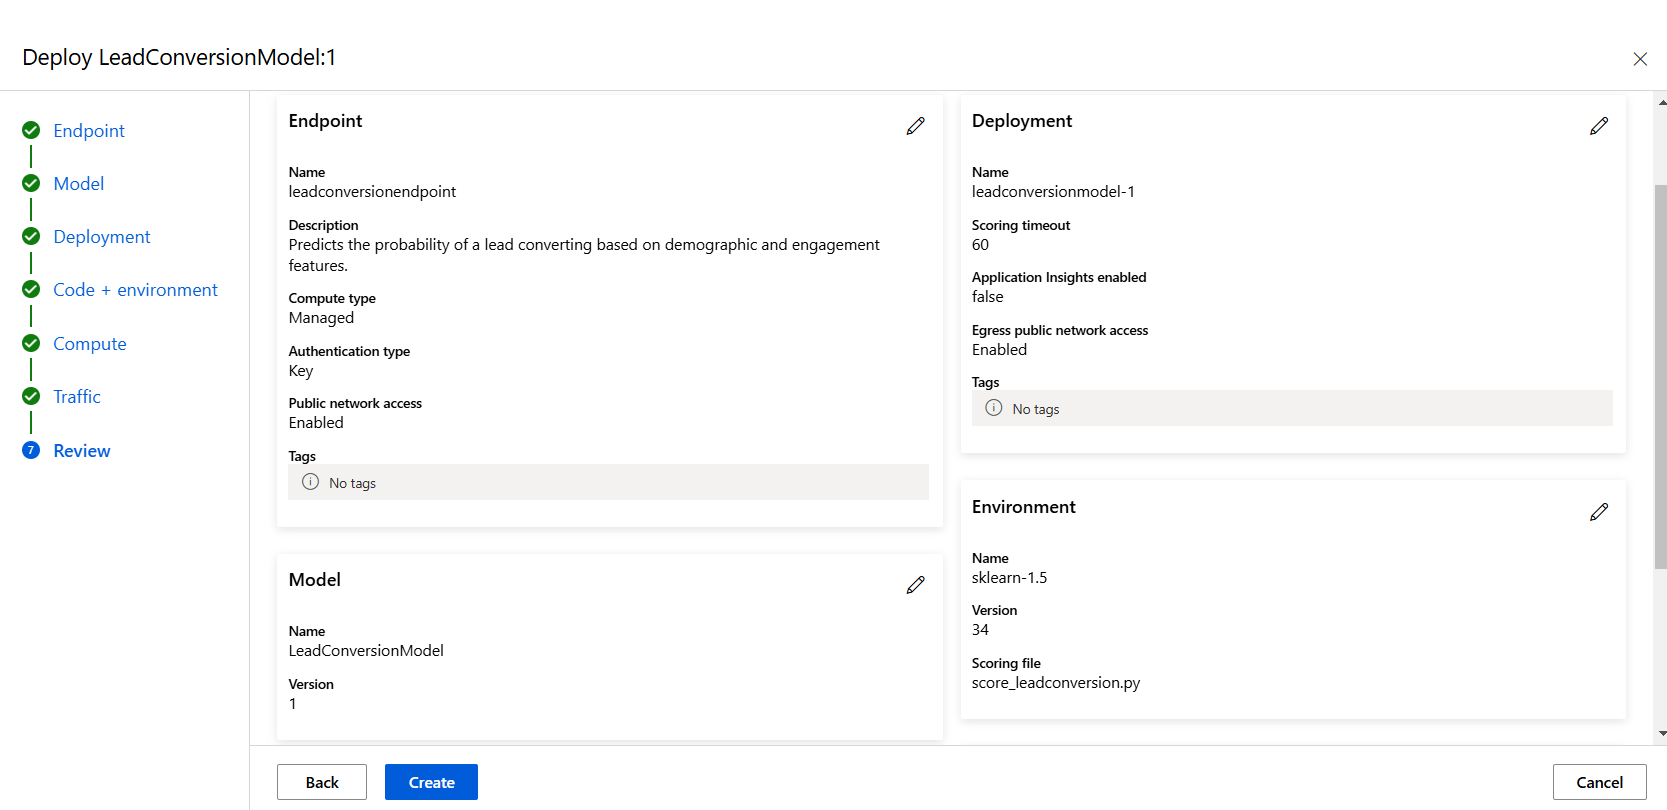

## Azure Machine Learning Integration

After training and evaluating both models locally in Jupyter, the next step was to integrate them into Microsoft Azure Machine Learning Studio for cloud-based deployment and scalability.

Both models (Lead Conversion Model and CLTV Prediction Model) were registered in Azure ML Studio as production-ready assets.

Then we configured deployment environments using Scikit-learn (v1.5) curated environment and prepared a scoring script for real-time inference.

Then we Attempted deployment through Azure Container Instance (ACI) to test the pipeline setup and endpoint generation.

Although deployment was paused due to subscription-level resource configuration, the process successfully demonstrated end-to-end ML lifecycle integration, from local model training to cloud registration and deployment setup.


---

## Step 10: Predict Conversion Probability and Customer Lifetime Value (CLTV)

In this step, we’ll use the trained **Random Forest** and **Linear Regression** models to make predictions on all customer records.

- **Goal:** Estimate the likelihood of each customer converting and predict their potential **Customer Lifetime Value (CLTV)** if they do convert.
- **Approach:**
  1. Use the trained **Lead Conversion Model (rf_model)** to predict conversion probabilities.
  2. Classify leads as “likely to convert” based on a probability threshold of **0.7**.
  3. For those predicted to convert, use the **CLTV Regression Model (lr_cltv)** to estimate the potential value.
  4. Calculate the **Expected CLTV**, which adjusts the predicted CLTV by conversion probability, giving a more realistic business metric.
  5. Save the final dataset as a CSV file for visualization in Tableau.

**Output:**  
A file named `final_customer_predictions.csv` containing key metrics such as:
- `Predicted_Conversion_Prob`  
- `Predicted_Conversion_Class`  
- `Predicted_CLTV`  
- `Expected_CLTV`

**This dataset will be used in the next step to create insightful Tableau dashboards for marketing and strategy.**

In [58]:
# -----------------------------
# Step 10: Generate Final Predictions for Visualization
# -----------------------------
final_df = df.copy()
print(f"Working with existing dataframe. Total rows: {len(final_df)}")

# -----------------------------
# 1. Define features for conversion prediction (Random Forest)
# -----------------------------
X_features = [
    'Age', 'Income', 'WebsiteVisits_PreConversion', 'TimeOnWebsite_Minutes',
    'TenureMonths', 'MonthlyRevenue', 'Gender', 'MaritalStatus', 'Province', 
    'EmploymentStatus', 'LeadSource', 'InitialProductInterest', 'FirstContactChannel',
    'HasExistingProducts', 'CallCenterInquiries', 'BranchVisits', 'ReferrerCustomer'
]

# One-hot encode and align with training columns
X_encoded = pd.get_dummies(final_df[X_features], drop_first=True)
X_encoded = X_encoded.reindex(columns=rf_model.feature_names_in_, fill_value=0)

# -----------------------------
# 2. Predict Conversion Probability & Class
# -----------------------------
final_df['Predicted_Conversion_Prob'] = rf_model.predict_proba(X_encoded)[:,1]
final_df['Predicted_Conversion_Class'] = (final_df['Predicted_Conversion_Prob'] >= 0.7).astype(int)

# -----------------------------
# 3. Predict CLTV for predicted converted leads
# -----------------------------
converted_customers = final_df[final_df['Predicted_Conversion_Class'] == 1].copy()

cltv_features = [
    'Age', 'Income', 'WebsiteVisits_PreConversion', 'TimeOnWebsite_Minutes',
    'MonthlyRevenue', 'TenureMonths', 'Gender', 'MaritalStatus', 'Province'
]

cltv_encoded = pd.get_dummies(converted_customers[cltv_features], drop_first=True)
cltv_encoded = cltv_encoded.reindex(columns=lr_cltv.feature_names_in_, fill_value=0)

converted_customers['Predicted_CLTV'] = lr_cltv.predict(cltv_encoded)

# Merge CLTV back into main dataframe
final_df = final_df.merge(
    converted_customers[['LeadID', 'Predicted_CLTV']],
    on='LeadID',
    how='left'
)

# -----------------------------
# 4. Calculate Expected CLTV
# -----------------------------
final_df['Predicted_CLTV'] = final_df['Predicted_CLTV'].fillna(0)
final_df['Expected_CLTV'] = final_df['Predicted_Conversion_Prob'] * final_df['Predicted_CLTV']

# -----------------------------
# 5. Save final predictions
# -----------------------------
final_df.to_csv("final_customer_predictions.csv", index=False)
print("✅ Final predictions saved to 'final_customer_predictions.csv'.")
final_df.head()

Working with existing dataframe. Total rows: 20000
✅ Final predictions saved to 'final_customer_predictions.csv'.


,LeadID,LeadSource,Age,Gender,EmploymentStatus,Income,MaritalStatus,Province,InitialProductInterest,WebsiteVisits_PreConversion,...,FirstTransactionAmount,MonthlyRevenue,TenureMonths,CLTV,IncomeBracket,AgeGroup,Predicted_Conversion_Prob,Predicted_Conversion_Class,Predicted_CLTV,Expected_CLTV
0,L00001,Referral,39,Female,Self-employed,60679.91,Divorced,British Columbia,Credit Card,2,...,0,0.00,0,0.00,40K-80K,Mid-Age (30–50),0.26,0,0.000000,0.000000
1,L00002,Partnership,19,Male,Part-time,48959.32,Single,Quebec,Credit Card,2,...,0,0.00,0,0.00,40K-80K,Young (<30),0.24,0,0.000000,0.000000
2,L00003,Social Media,21,Male,Unknown,28953.99,Married,British Columbia,Investment,2,...,2378,39.09,54,2110.99,<40K,Young (<30),0.76,1,5030.188220,3822.943047
3,L00004,Branch Walk-in,62,Female,Part-time,75863.07,Single,Quebec,Credit Card,1,...,1498,110.63,43,4757.23,40K-80K,Senior (50+),0.87,1,5390.612661,4689.833015
4,L00005,Online Ad,30,Female,Self-employed,48526.55,Married,Ontario,Chequing Account,8,...,0,0.00,0,0.00,40K-80K,Mid-Age (30–50),0.22,0,0.000000,0.000000


##### Note:

###### Why we created predicted values:

- Historical vs. Predictive

CLTV and Conversion Flag in your dataset are historical. They tell us what actually happened for these customers in the past.

Predicted_Conversion_Prob and Predicted_CLTV are model outputs. They estimate what is likely to happen in the future if we acquire similar leads.

This is key for decision-making: we want to act on predictions, not just history.

- Probability vs. binary outcome

Conversion Flag is binary: 0 or 1.

Predicted_Conversion_Prob gives a probability between 0 and 1, allowing us to prioritize leads by likelihood of conversion.

Example: Two leads may have converted historically, but one might have a 95% chance of converting if repeated — that’s more valuable to target first.

- Expected CLTV = CLTV × Conversion Probability

We multiply the predicted conversion probability by predicted CLTV to get Expected_CLTV, which combines short-term conversion likelihood and long-term value into a single actionable metric.

This helps prioritize leads or segments that are not only likely to convert but also highly profitable.

###### Scenario planning

By using predicted values, we can simulate “what if” scenarios for new leads or for marketing campaigns without having to wait for actual conversions.

Historical data only tells us about past customers; predictions let us optimize future outcomes.


---


## Step 10: Export Final Predictions for Tableau Visualization

Now, we have completed our modeling and CLTV prediction, and exported the final dataset to a CSV file that can be used in Tableau for visualization and dashboard creation.

This dataset includes:

- Lead attributes such as demographics, engagement, and revenue.

- Predicted conversion probability and conversion class (0 or 1).

- Predicted and expected CLTV values for further business insights.

The exported file (final_customer_predictions.csv) will be saved in the current working directory and later imported into Tableau to visualize patterns like:

- Top provinces and age groups with the highest conversion rates

- Relationship between revenue, tenure, and CLTV

- Impact of engagement metrics (website visits and time on site) on conversion likelihood

**Note: I have included static visualization snapshots for reference here. For a fully interactive view, the complete Tableau dashboard for this project is publicly accessible.**

#### 10.A: Conversion Probability by Age

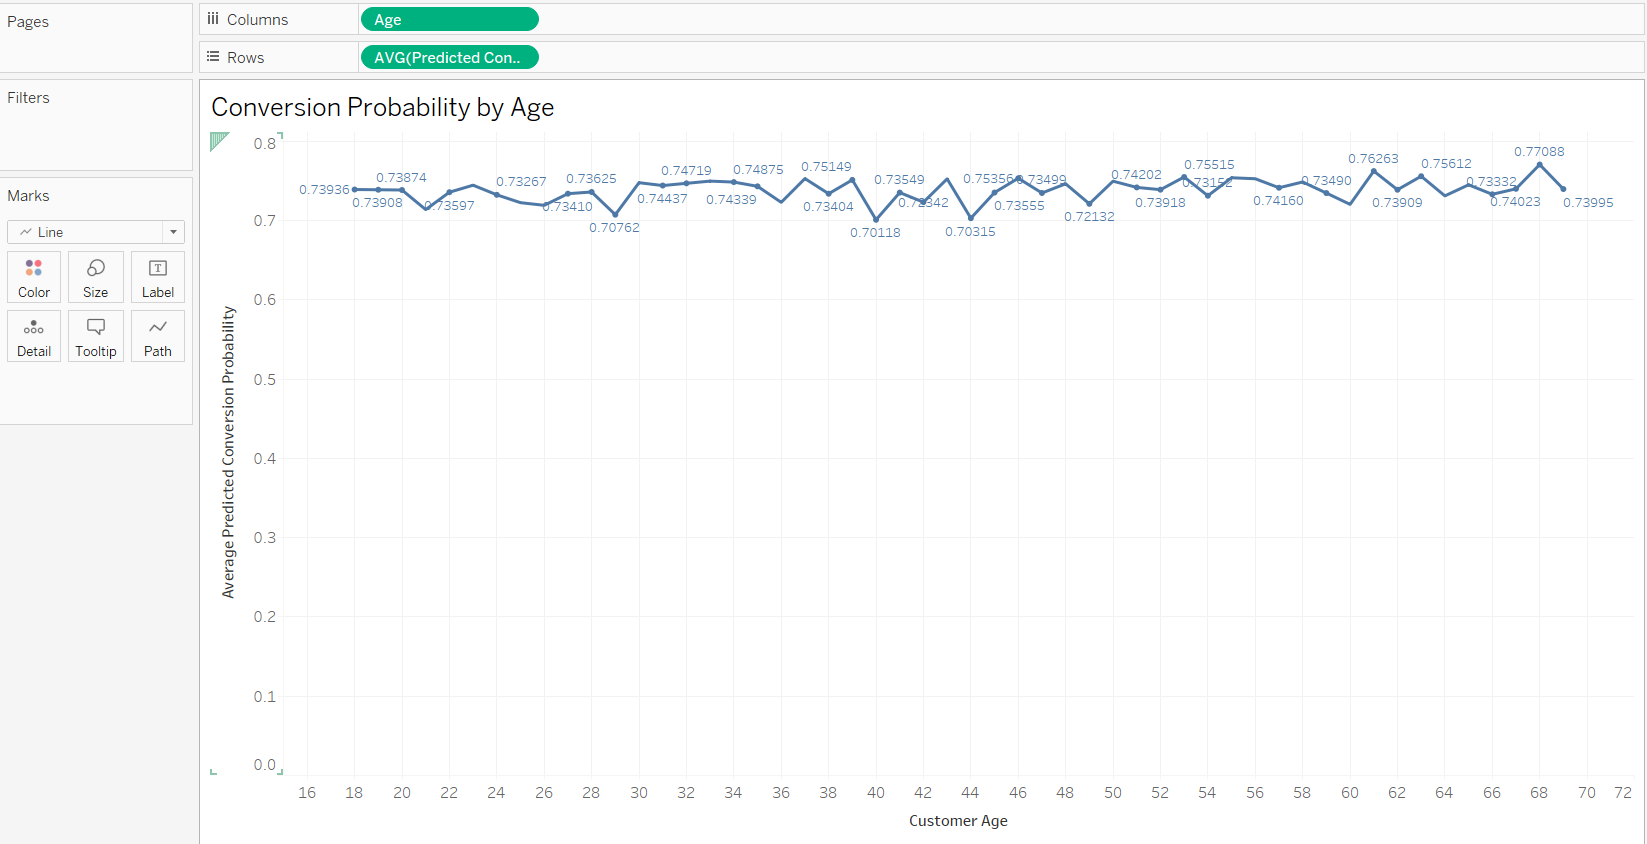

Most of our predicted conversion probabilities are between 0.70–0.77, which means our model is confident but not extreme. Most leads have a moderate-to-high chance of conversion, with few at the extremes (like <0.3 or >0.9).

###### Interpretation from the chart:

- The age variable may not be a strong differentiator for conversion probability.

- In other words, conversion rates are similar across ages as age doesn’t seem to predict who converts better.

- That’s useful insight, whcih means marketing focus shouldn’t be age-specific.

#### 10.B: Conversion Probability by Lead Source
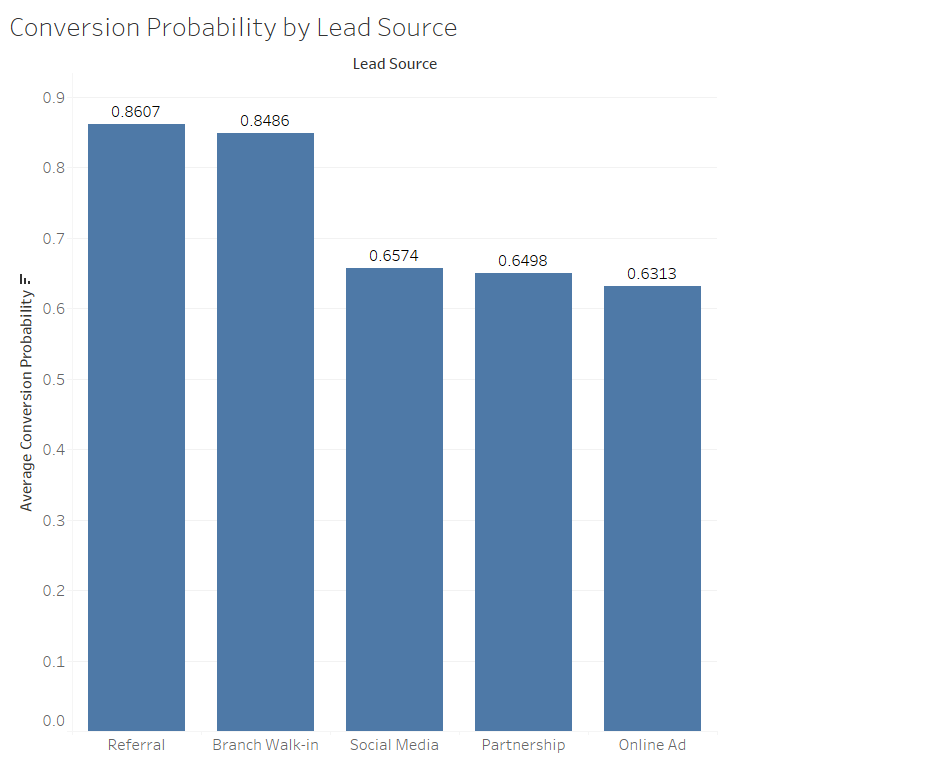
###### Interpretation from the chart:

- Referrals and Branch Walk-ins convert at significantly higher rates than digital channels.

- This suggests that trust-based interactions and in-person communication remain key drivers of customer acquisition.

- Online Ads and Partnerships underperform, indicating opportunities to optimize targeting or refine messaging for these lead sources.

#### 10.C: CLTV by Province
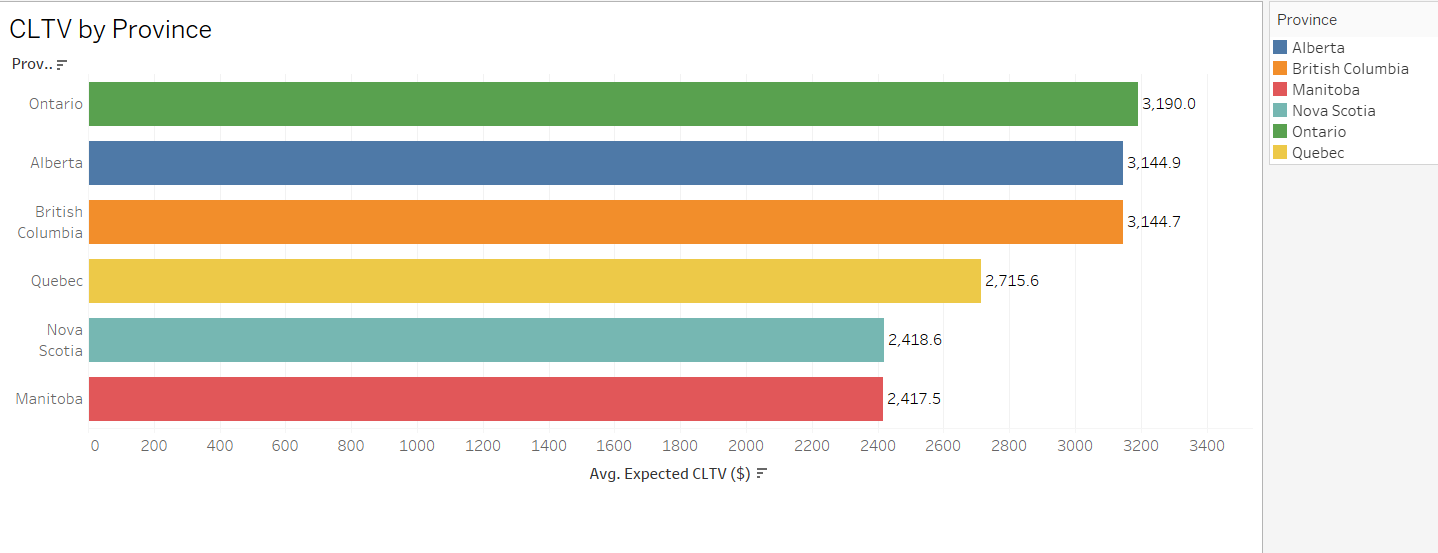
###### Insights:

Ontario leads with the highest **average expected CLTV ($3,190)**, followed closely by **Alberta (3,145)** and **British Columbia (3,145)**.  
These three provinces contribute the strongest long-term customer value potential, likely due to higher income levels and stronger engagement with financial products.

In contrast, **Quebec (2,716)**, **Nova Scotia ($2,419)**, and **Manitoba (2,417)** show slightly lower CLTV averages, indicating opportunities to increase customer retention or upsell strategies in these regions.

*(“Unknown” province values were excluded for data clarity.)*


#### 10.D: CLTV by Product Interest
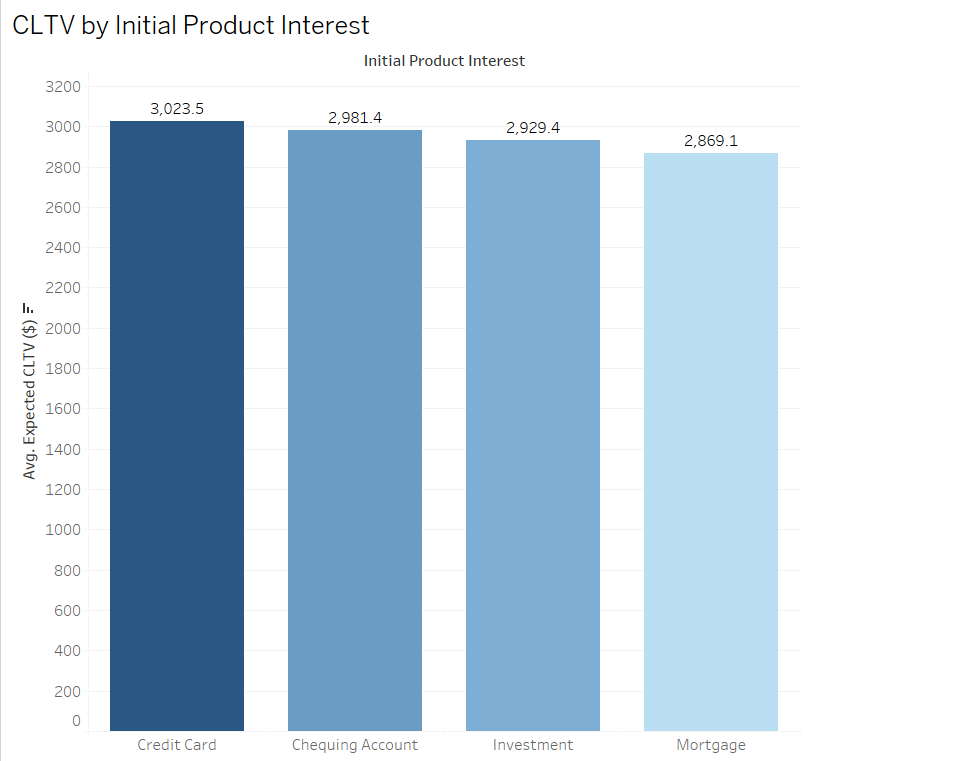
When comparing **Customer Lifetime Value (CLTV)** across product categories, a clear hierarchy emerges:

| **Product Interest** | **Avg CLTV** | **Avg Predicted Conversion Prob. (Color Intensity)** |
|-----------------------|--------------|------------------------------------------------------|
| Credit Card           | 3023.5       | 🔵 High                                              |
| Chequing Account      | 2981.4       | 🔵 Moderate–High                                     |
| Investment            | 2929.4       | 🔵 Moderate                                          |
| Mortgage              | 2869.1       | ⚪ Low                                               |

The **color gradient** (blue intensity) reflects how conversion probability aligns with CLTV; darker shades imply stronger conversion potential.

###### Interpretation
Credit cards sit at the sweet spot as we can see taht they attract high-value customers *and* show the strongest conversion probabilities. This suggests that acquisition campaigns around credit cards are not just driving interest but sustaining profitable relationships.

Chequing and investment products hold mid-tier positions, appealing to a broad base but with slightly lower predicted conversion engagement.

Mortgage products, while traditionally long-term revenue drivers, trail in both CLTV and conversion probability here, hinting that either **lead quality** or **customer readiness** for mortgage offerings might be weaker in this dataset.

###### Key Takeaway
If the goal is **maximizing ROI per acquired customer**, focusing on **Credit Card** and **Chequing** campaigns offers the best balance of conversion efficiency and long-term value, while **Mortgage** may require deeper segmentation or tailored targeting to close the gap.

#### 10.E: Customer Segments by Conversion Likelihood

To identify which customer segments are most likely to convert, we’ll segment customers by:
- **Age Group** → Young, Mid-Age, Senior  
- **Income Bracket** → based on existing income ranges  
- **Product Interest** → e.g., Credit Card, Mortgage, Investment, etc.

This will help uncover high-potential segments which is valuable for targeted marketing and resource allocation.

In [53]:
# Create Age Group column
def categorize_age(age):
    if age < 30:
        return "Young (<30)"
    elif 30 <= age <= 50:
        return "Mid-Age (30–50)"
    else:
        return "Senior (50+)"

df['AgeGroup'] = df['Age'].apply(categorize_age)

# (Optional) Keep the existing IncomeBracket column as is
# But ensure it’s clean
df['IncomeBracket'] = df['IncomeBracket'].replace({
    '40K–80K': '40K-80K',
    '<40K': '<40K',
    '80K–120K': '80K-120K',
    '>120K': '>120K'
})

# Export for Tableau
segmented_path = "customer_segments_for_tableau.csv"
df[['AgeGroup', 'IncomeBracket', 'InitialProductInterest', 'ConversionProbability']].to_csv(segmented_path, index=False)

print(f"Segmented dataset exported to '{segmented_path}' with columns: AgeGroup, IncomeBracket, ProductInterest, ConversionProb")
print("Rows:", df.shape[0])

Segmented dataset exported to 'customer_segments_for_tableau.csv' with columns: AgeGroup, IncomeBracket, ProductInterest, ConversionProb
Rows: 20000


C:\Users\beeka\AppData\Local\Temp\ipykernel_12000\2591241723.py:14: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['IncomeBracket'] = df['IncomeBracket'].replace({


##### Heatmap: Conversion Probability by Age and Income
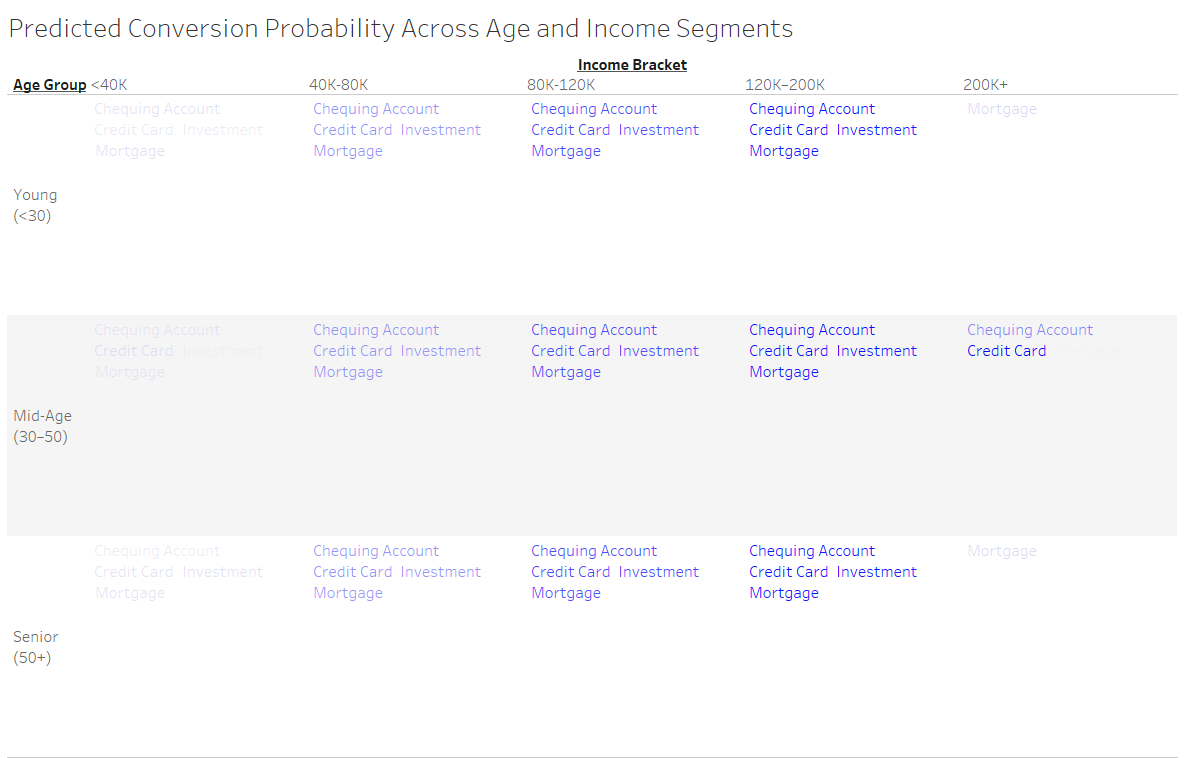
This heatmap shows the **average predicted conversion probability** across different customer segments based on **age** and **income brackets**.  
- **Color intensity** (blue gradient) represents higher predicted probabilities.  
- **Cell labels** display the primary **Initial Product Interest** for that segment.  

From this visualization, we can quickly identify **high-conversion segments** and tailor marketing strategies accordingly.

After analyzing predicted conversion probabilities across **AgeGroups** and **IncomeBrackets**, with product interests overlaid for context:

**Key takeaways:**

- **Lower Income (<40K):** Conversion probabilities are uniformly low (50–53%) across all ages and products whcih shows limited engagement.
- **Mid Income (40K–80K):** Slightly higher engagement (67–69%), consistent across young, mid-senior, and senior groups.
- **Upper-Mid Income (80K–120K):** Noticeable increase in conversion probability (82–84%), showing stronger likelihood to convert across all products.
- **High Income (120K–200K):** Highest conversion probabilities (92–96%) across all age groups and products, which is our most lucrative segment.
- **Ultra High Income (200K+):** Segment is highly selective:
  - Young: Only mortgage shows moderate conversion (~55%), other products negligible.  
  - Mid-senior: Credit Card conversions peak (97.6%), Chequing account moderate (72%), others minimal.  
  - Senior: Only mortgage shows low conversion (~54%).  

**Insight:**  
Conversion probability strongly correlates with **income**, while **age** has a subtler effect. High-value segments (120K–200K) are highly responsive across all products, while ultra high-income individuals are very selective in their product preference.

#### 10.F:Feature Importance: What Drives Conversions?

To understand what factors most influence whether a lead converts, we examine the feature importances derived from our Random Forest model. This analysis highlights the relative impact of each input variable on conversion probability.

Key points:

- Referral Source and Income are expected to be the strongest drivers.
- Variables like Age, Province, or Marital Status may have smaller effects.
- Insights from this chart can guide marketing strategies, helping prioritize campaigns and target segments with higher conversion potential.

In [56]:
# -----------------------------
# Feature Importance for Conversions
# -----------------------------

feature_importances = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Preview top 10 features
#print("Top 10 Features Driving Conversion:")
#print(feature_importances.head(10))

# Export for Tableau
feature_importances.to_csv("feature_importances_for_tableau.csv", index=False)
#print("✅ Feature importances saved to 'feature_importances_for_tableau.csv'.")


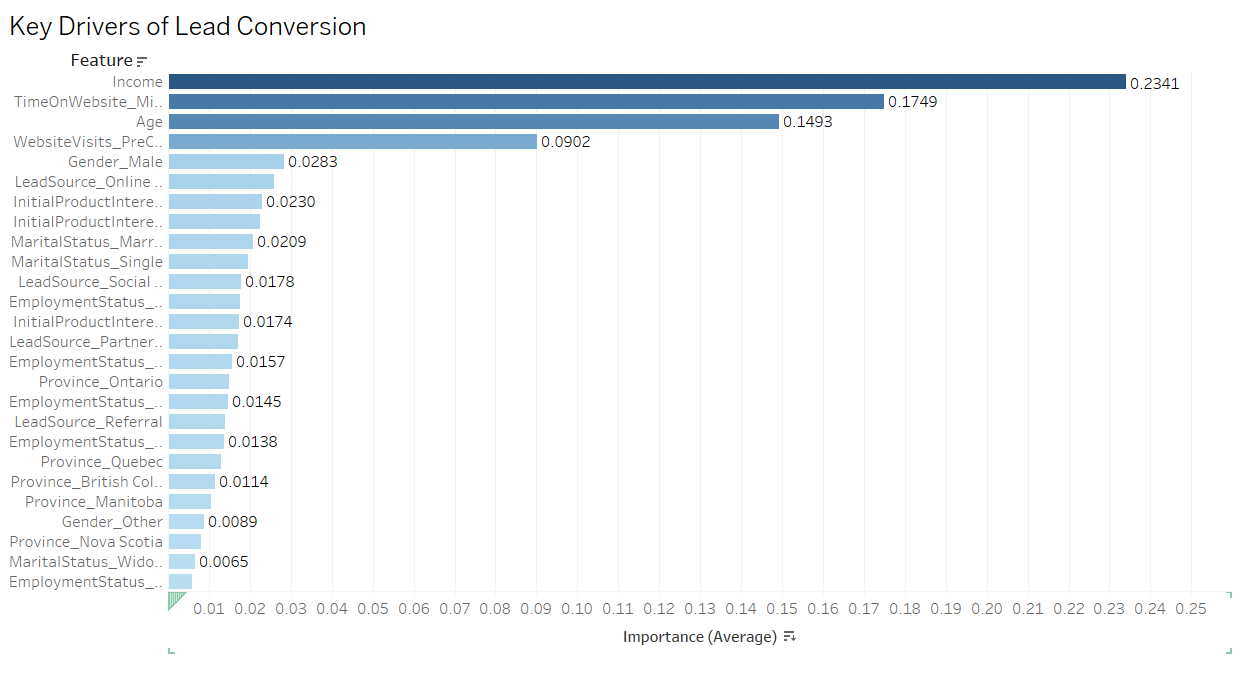
###### Interpretataion:

We analyzed which factors most influence a customer's likelihood to convert using our Random Forest model. The bar chart below shows the relative importance of each feature:

- **Top drivers:** `Income` (0.23) and `Time on Website` (0.17) are the strongest indicators of conversion likelihood.
- **Moderate impact:** `Age` and `Website Visits Pre-Conversion` show meaningful influence.
- **Lower impact:** Gender, product interest, lead source, and province contribute but with smaller effect sizes.

The color gradient on the bars visually emphasizes the most important features (darker blue = higher importance), making it easy to spot which variables your marketing or targeting strategies should prioritize.


## Final Conclusion

This project demonstrates how data and machine learning can transform customer acquisition from a guessing game into a measurable growth strategy. Through predictive modeling and visualization, we uncovered how factors like income, referral source, and online engagement shape both conversion likelihood and Customer Lifetime Value (CLTV). By identifying who is most likely to convert, and which customers drive the greatest long-term value, we revealed clear links between marketing actions and financial outcomes.

The analysis showed that income, engagement, and acquisition channel are key conversion drivers, but not all easy wins are the most profitable. Some high-value segments require more nurturing, highlighting the balance between short-term gains and sustainable growth.

Ultimately, this project illustrates how predictive analytics turns raw data into actionable business intelligence, helping banks target smarter, allocate budgets efficiently, and maximize ROI. It empowers decision-makers to focus on the channels and audiences that deliver not just conversions, but lasting relationships.

Built using Python and Tableau, and designed for integration with Azure AI services, this end-to-end project combines machine learning, data visualization, and cloud-ready architecture, reflecting a real-world, data-driven approach to strategic growth in the banking industry.